In [1]:
# Import libraries.
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import statsmodels.api as sm 
import statsmodels.stats.api as sms
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan
import sklearn
from sklearn import metrics 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import scipy.stats
from scipy.stats import shapiro

# need to find out how to use XGBoost

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\justi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\justi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\justi\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\justi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/merged_sentiment_copy.csv'
df_uk_full = pd.read_csv(url)  

df_uk_full

,Date,ftse_250_price,ftse_250_total_return,base_rate,CPI,ftse_350_Price,"ftse_350_Total Return (Gross, Unhedged)",price_02_Price,"price_02_Total Return (Gross, Unhedged)",confidence_score,price_05_Price,"price_05_Total Return (Gross, Unhedged)",price_10_Price,"price_10_Total Return (Gross, Unhedged)",unemployment_rate,wage_growth_rate,gdp_GDP,polarity_score_finbert
0,01-12-89,2661.760010,803.789978,14.713333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN
1,01-01-90,2591.129883,783.250000,14.630000,5.7,1165.829956,725.320007,NaN,NaN,-19.0,NaN,NaN,NaN,NaN,6.9,NaN,0.5,NaN
2,01-02-90,2463.879883,746.010010,14.546667,5.9,1121.469971,700.580017,NaN,NaN,-24.0,NaN,NaN,NaN,NaN,6.9,NaN,0.5,NaN
3,01-03-90,2437.370117,741.700012,14.463333,6.0,1115.699951,701.400024,NaN,NaN,-35.0,NaN,NaN,NaN,NaN,6.9,NaN,0.7,NaN
4,01-04-90,2285.780029,701.510010,14.380000,6.4,1044.619995,660.010010,NaN,NaN,-31.0,NaN,NaN,NaN,NaN,6.9,NaN,0.7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,01-12-24,20622.605250,18346.656780,4.666667,2.5,4510.612374,9911.349295,97.599004,202.318,-17.0,76.436604,258.074,70.333738,1158.944,4.4,6.0,0.1,NaN
425,01-01-25,20950.482850,18672.852080,4.583333,3.0,4760.296255,10468.532720,97.964750,203.450,-22.0,77.157249,260.303,70.983754,1169.039,4.4,5.6,0.1,NaN
426,01-02-25,20326.383590,18140.063380,4.500000,2.8,4808.022992,10614.288820,97.931114,204.230,-20.0,77.946072,262.794,71.900830,1181.575,4.4,5.6,0.1,NaN
427,01-03-25,19475.479520,17424.441290,4.500000,2.6,4675.031137,10374.199300,98.206564,204.810,-19.0,76.341361,258.271,69.708409,1153.159,4.4,5.6,0.1,NaN


In [3]:
df_uk_full.describe()

,ftse_250_price,ftse_250_total_return,base_rate,CPI,ftse_350_Price,"ftse_350_Total Return (Gross, Unhedged)",price_02_Price,"price_02_Total Return (Gross, Unhedged)",confidence_score,price_05_Price,"price_05_Total Return (Gross, Unhedged)",price_10_Price,"price_10_Total Return (Gross, Unhedged)",unemployment_rate,wage_growth_rate,gdp_GDP,polarity_score_finbert
count,429.000000,429.000000,429.000000,428.000000,428.000000,428.000000,327.000000,327.000000,428.000000,327.000000,327.000000,345.000000,345.000000,428.000000,293.000000,429.000000,294.000000
mean,10618.089403,7088.524507,3.895254,2.741589,2898.553707,4074.876157,102.199686,165.608471,-12.196262,116.558976,233.210150,119.766901,1072.605623,6.202804,3.380546,0.498368,0.071241
std,6486.845572,5765.988797,3.433704,2.147064,963.999754,2551.074231,2.019057,28.512795,12.157390,16.419084,91.571367,20.393053,495.807034,1.857170,1.960185,2.497648,0.162852
min,1974.040039,618.229981,0.175000,-0.100000,968.719971,626.700012,96.086395,100.000000,-49.000000,74.537811,100.000000,69.708409,343.756000,3.600000,-2.900000,-20.300000,-0.485326
25%,4811.399902,2127.800049,0.426966,1.500000,2181.337488,2134.199993,101.393485,141.963000,-21.000000,108.945661,149.728500,108.732895,636.799000,4.800000,2.000000,0.300000,-0.000799
50%,9306.890000,5232.980000,4.500000,2.200000,2996.230000,3465.360000,102.760895,181.923000,-10.000000,117.472840,244.103000,119.794840,943.254000,5.500000,3.200000,0.500000,0.062303
75%,17168.343780,12172.659480,5.730000,3.000000,3666.856365,5929.765691,103.605045,186.355000,-3.000000,126.876200,299.265500,133.330400,1412.945000,7.800000,4.700000,0.800000,0.176186
max,24102.191970,19395.493530,14.713333,11.100000,4808.022992,10614.288820,105.672380,206.139000,10.000000,152.680969,423.925000,168.403976,2192.415000,10.700000,8.900000,16.800000,0.514315


In [4]:
df_uk_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429 entries, 0 to 428
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Date                                     429 non-null    object 
 1   ftse_250_price                           429 non-null    float64
 2   ftse_250_total_return                    429 non-null    float64
 3   base_rate                                429 non-null    float64
 4   CPI                                      428 non-null    float64
 5   ftse_350_Price                           428 non-null    float64
 6   ftse_350_Total Return (Gross, Unhedged)  428 non-null    float64
 7   price_02_Price                           327 non-null    float64
 8   price_02_Total Return (Gross, Unhedged)  327 non-null    float64
 9   confidence_score                         428 non-null    float64
 10  price_05_Price                           327 non-n

In [5]:
# Convert date to datetime
df_uk_full['Date'] = pd.to_datetime(df_uk_full['Date'], errors='coerce', dayfirst=True)

#Check if the data types are right 
df_uk_full.dtypes

C:\Users\justi\AppData\Local\Temp\ipykernel_5708\3670151657.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_uk_full['Date'] = pd.to_datetime(df_uk_full['Date'], errors='coerce', dayfirst=True)


Date                                       datetime64[ns]
ftse_250_price                                    float64
ftse_250_total_return                             float64
base_rate                                         float64
CPI                                               float64
ftse_350_Price                                    float64
ftse_350_Total Return (Gross, Unhedged)           float64
price_02_Price                                    float64
price_02_Total Return (Gross, Unhedged)           float64
confidence_score                                  float64
price_05_Price                                    float64
price_05_Total Return (Gross, Unhedged)           float64
price_10_Price                                    float64
price_10_Total Return (Gross, Unhedged)           float64
unemployment_rate                                 float64
wage_growth_rate                                  float64
gdp_GDP                                           float64
polarity_score

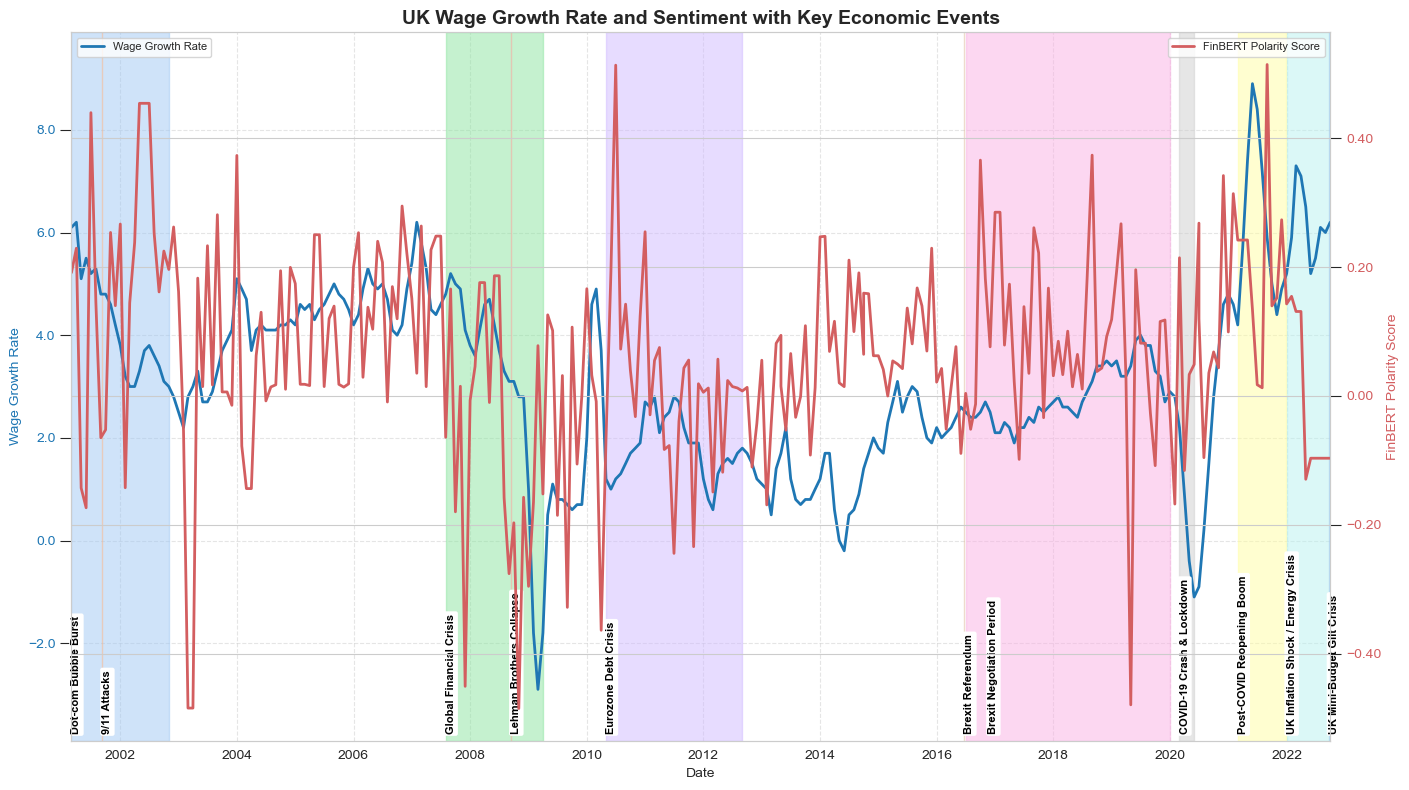

In [6]:
# Filter data from 1 Sep 1998 onwards
start_date = pd.to_datetime('2001-03-01')
df_plot = df_uk_full[df_uk_full['Date'] >= start_date].copy()
df_plot = df_plot.dropna(subset=['wage_growth_rate', 'polarity_score_finbert'])

# Define key economic events
events = {
    'Early 1990s Recession (UK)': {'Start': '1990-07-01', 'End': '1992-09-30'},
    'Black Wednesday (ERM Crisis)': {'Start': '1992-09-16', 'End': '1992-09-16'},
    'BoE Operational Independence': {'Start': '1997-05-06', 'End': '1997-05-06'},
    'Dot-com Bubble Burst': {'Start': '2000-03-01', 'End': '2002-10-31'},
    '9/11 Attacks': {'Start': '2001-09-11', 'End': '2001-09-11'},
    'Global Financial Crisis (GFC)': {'Start': '2007-08-01', 'End': '2009-03-31'},
    'Lehman Brothers Collapse': {'Start': '2008-09-15', 'End': '2008-09-15'},
    'Eurozone Debt Crisis': {'Start': '2010-05-01', 'End': '2012-08-31'},
    'Brexit Referendum': {'Start': '2016-06-23', 'End': '2016-06-23'},
    'Brexit Negotiation Period': {'Start': '2016-07-01', 'End': '2019-12-31'},
    'COVID-19 Crash & Lockdown': {'Start': '2020-03-01', 'End': '2020-05-31'},
    'Post-COVID Reopening Boom': {'Start': '2021-03-01', 'End': '2021-12-31'},
    'UK Inflation Shock / Energy Crisis': {'Start': '2022-01-01', 'End': '2022-12-31'},
    'UK Mini-Budget Gilt Crisis': {'Start': '2022-09-23', 'End': '2022-10-14'}
}

# Plot style
sns.set_style('whitegrid')
fig, ax1 = plt.subplots(figsize=(14, 8))

# Wage Growth Rate Plot
color_cs = '#1F77B4'
ax1.set_xlabel('Date', fontsize=10)
ax1.set_ylabel('Wage Growth Rate', color=color_cs, fontsize=10)
ax1.plot(df_plot['Date'], df_plot['wage_growth_rate'], color=color_cs, label='Wage Growth Rate', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color_cs, size=8)

# Sentiment Score Plot
ax2 = ax1.twinx()
color_sentiment = '#d35e60'
ax2.set_ylabel('FinBERT Polarity Score', color=color_sentiment, fontsize=10)
ax2.plot(df_plot['Date'], df_plot['polarity_score_finbert'], color=color_sentiment, label='FinBERT Polarity Score', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color_sentiment, size=8)

# Event Shading and Labels
event_colors = sns.color_palette('pastel', n_colors=len(events)).as_hex()
label_y_offset = 0.01
label_fontsize = 8
i = 0

label_positions = {}
brexit_referendum_end = pd.to_datetime(events['Brexit Referendum']['End'])
label_positions['Brexit Referendum'] = brexit_referendum_end
label_positions['Brexit Negotiation Period'] = brexit_referendum_end + pd.Timedelta(days=150)

for event_name, dates in events.items():
    start = pd.to_datetime(dates['Start'])
    end = pd.to_datetime(dates['End'])

    if end >= start_date:
        display_start = max(start, start_date)
        ax1.axvspan(display_start, end, color=event_colors[i % len(event_colors)], alpha=0.5)
        label_x_pos = label_positions.get(event_name, display_start)

        ax1.text(label_x_pos, 0.01,
                 event_name.split('(')[0].strip(),
                 rotation=90,
                 fontsize=label_fontsize,
                 color='black',
                 fontweight='bold',
                 ha='left',
                 va='bottom',
                 transform=ax1.get_xaxis_transform(),
                 zorder=5,
                 bbox=dict(
                     facecolor='white',
                     alpha=1,
                     edgecolor='none',
                     boxstyle='round,pad=0.2'
                 ))
        i += 1

# Titles and formatting
plt.title('UK Wage Growth Rate and Sentiment with Key Economic Events', fontsize=14, fontweight='bold')
fig.tight_layout()
ax1.xaxis.set_major_locator(mdates.YearLocator(2))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45, ha='right', fontsize=8)
ax1.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.1f}'))
ax2.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.2f}'))

# Legends
ax1.legend(loc='upper left', fontsize=8)
ax2.legend(loc='upper right', fontsize=8)

# Grid and limits
ax1.grid(True, which='major', linestyle='--', alpha=0.5)
ax1.set_xlim(start_date, df_plot['Date'].max())
ax1.set_ylim(df_plot['wage_growth_rate'].min() - 1, df_plot['wage_growth_rate'].max() + 1)


plt.show()

#### This chart shows the relationship between the Wage Growth Rate (blue line) and FinBERT Polarity Score (red line) over time, alongside major economic events. Overall, wage growth appears to decline during major crises like the Global Financial Crisis and COVID-19, then partially recover. The sentiment score is more volatile, fluctuating frequently around these events. The highlighted periods clearly mark how both indicators respond to economic shocks, with sentiment often showing sharp reactions, while wage growth changes more gradually.

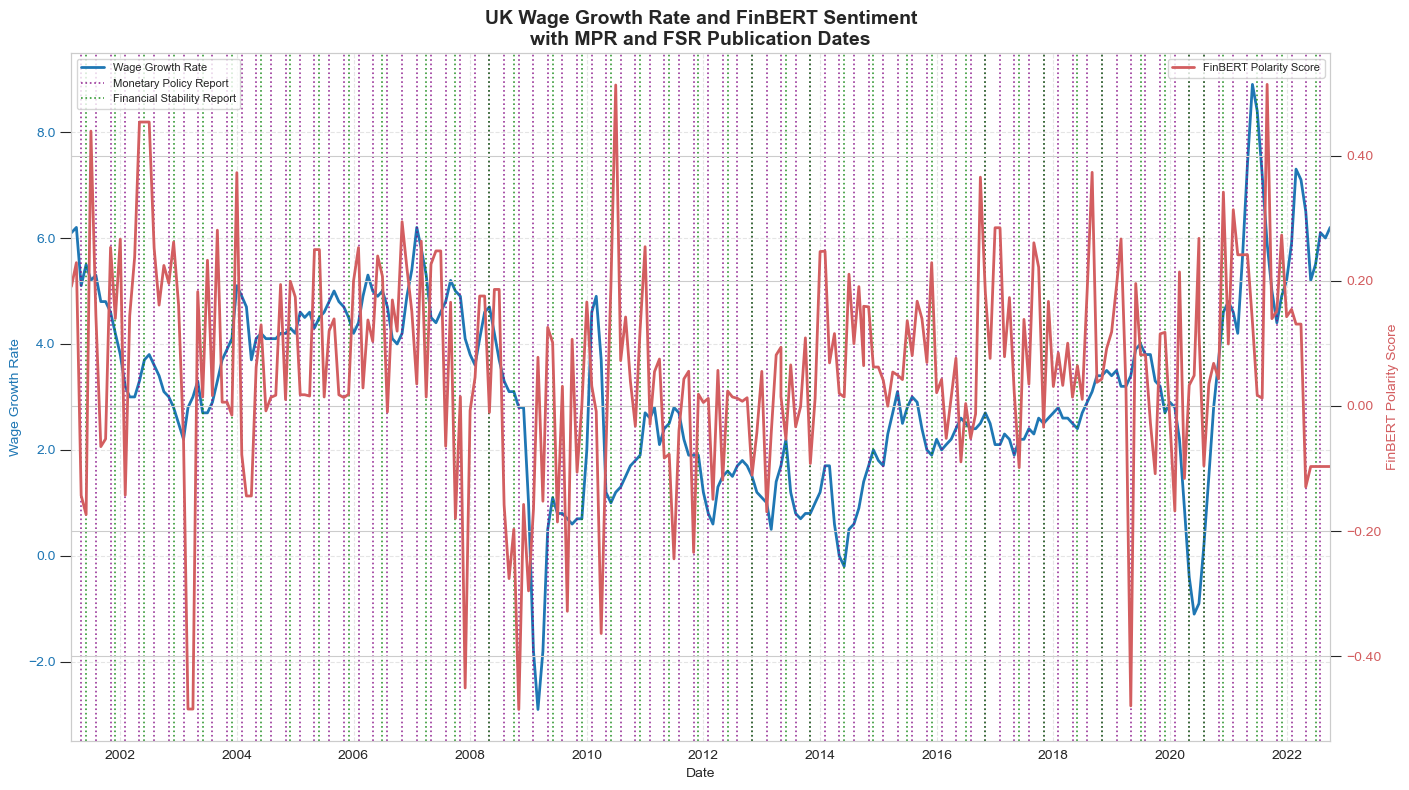

In [8]:
# Filter data from 1 Sep 1998 onwards
start_date = pd.to_datetime('2001-03-01')
df_plot2 = df_uk_full[df_uk_full['Date'] >= start_date].copy()
df_plot2 = df_plot2.dropna(subset=['wage_growth_rate', 'polarity_score_finbert'])

# Load publication dates from repo
mpr_url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/report_publication_dates/mpr_dates_cleaned.csv'
fsr_url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/report_publication_dates/fsr_dates_cleaned.csv'

mpr_dates = pd.read_csv(mpr_url, parse_dates=["date"])
fsr_dates = pd.read_csv(fsr_url, parse_dates=["date"])

# Apply style
sns.set_style('whitegrid')

# Plot setup
fig, ax1 = plt.subplots(figsize=(14, 8))

# Confidence Score (Left Axis)
color_conf = '#d35e60'
ax1.set_xlabel('Date', fontsize=10)
ax1.set_ylabel('Wage Growth Rate', color=color_cs, fontsize=10)
ax1.plot(df_plot['Date'], df_plot['wage_growth_rate'], color=color_cs, label='Wage Growth Rate', linewidth=2)
ax1.tick_params(axis='y', labelcolor=color_cs, size=8)


# FinBERT Polarity Score (Right Axis)
ax2 = ax1.twinx()
color_sentiment = '#d35e60'
ax2.set_ylabel('FinBERT Polarity Score', color=color_sentiment, fontsize=10)
ax2.plot(df_plot2['Date'], df_plot2['polarity_score_finbert'], color=color_sentiment, label='FinBERT Polarity Score', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color_sentiment, size=8)

# Add MPR vertical lines (Purple)
for date in mpr_dates['date']:
    ax1.axvline(x=date, color='purple', linestyle=':', linewidth=1.2, alpha=0.8, label='Monetary Policy Report')

# Add FSR vertical lines (Green)
for date in fsr_dates['date']:
    ax1.axvline(x=date, color='green', linestyle=':', linewidth=1.2, alpha=0.8, label='Financial Stability Report')

# Title and layout
plt.title('UK Wage Growth Rate and FinBERT Sentiment\nwith MPR and FSR Publication Dates', fontsize=14, fontweight='bold')
fig.tight_layout()

# X-axis formatting
ax1.xaxis.set_major_locator(mdates.YearLocator(2))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.xticks(rotation=45, ha='right', fontsize=8)

# Y-axis formatting
ax1.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.1f}'))
ax2.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:.2f}'))

# Deduplicated legends
handles, labels = ax1.get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))
ax1.legend(unique_labels.values(), unique_labels.keys(), loc='upper left', fontsize=8)

handles2, labels2 = ax2.get_legend_handles_labels()
unique_labels2 = dict(zip(labels2, handles2))
ax2.legend(unique_labels2.values(), unique_labels2.keys(), loc='upper right', fontsize=8)

# Grid and limits
ax1.grid(True, which='major', linestyle='--', alpha=0.5)
ax1.set_xlim(start_date, df_plot2['Date'].max())
# Optional: remove y-axis limit so negative confidence values show
# ax1.set_ylim(bottom=-0.5)  # <-- comment or remove this line if needed

plt.show()

In [9]:
# Drop unnecessary columns. Alters the original "df_uk" dataframe to reflected dropped columns
df_uk_focused = df_uk_full.drop(['ftse_250_price',
                            'ftse_350_Price',
                            'ftse_350_Total Return (Gross, Unhedged)',
                            'price_02_Price',
                            'price_05_Price',
                            'price_05_Total Return (Gross, Unhedged)',
                            'price_10_Price',
                            'price_10_Total Return (Gross, Unhedged)'], axis=1)

# View column names.
df_uk_focused.columns

Index(['Date', 'ftse_250_total_return', 'base_rate', 'CPI',
       'price_02_Total Return (Gross, Unhedged)', 'confidence_score',
       'unemployment_rate', 'wage_growth_rate', 'gdp_GDP',
       'polarity_score_finbert'],
      dtype='object')

In [10]:
# Rename the column headers.
df_uk_focused.rename(columns={
    'base_rate': 'BoE_base_rate',
    'CPI': 'CPI_pct_change',
    'gdp_GDP': 'GDP_pct_change',
    'price_02_Total Return (Gross, Unhedged)': '0-2yr_gilts_TReturns',
    'polarity_score_finbert':'finbert_sentiment_score'
}, inplace=True)

# View column names.
df_uk_focused.columns

Index(['Date', 'ftse_250_total_return', 'BoE_base_rate', 'CPI_pct_change',
       '0-2yr_gilts_TReturns', 'confidence_score', 'unemployment_rate',
       'wage_growth_rate', 'GDP_pct_change', 'finbert_sentiment_score'],
      dtype='object')

In [11]:
# Filter rows from 2001-03-01 onwards
df_uk_focused = df_uk_focused[df_uk_focused['Date'] >= pd.to_datetime('2001-03-01')]

# Define the new column order
new_column_order = [
    'Date', 'wage_growth_rate', 'confidence_score', 'finbert_sentiment_score',
    'CPI_pct_change', 'unemployment_rate', 'GDP_pct_change',
    'ftse_250_total_return', 'BoE_base_rate', '0-2yr_gilts_TReturns'
]

# Reorder the DataFrame columns
df_uk_focused = df_uk_focused[new_column_order]

# Display the first few rows
df_uk_focused.head()

,Date,wage_growth_rate,confidence_score,finbert_sentiment_score,CPI_pct_change,unemployment_rate,GDP_pct_change,ftse_250_total_return,BoE_base_rate,0-2yr_gilts_TReturns
136,2001-03-01,6.1,3.0,0.191264,0.9,5.0,0.4,2802.949951,5.625000,119.314
137,2001-04-01,6.2,1.0,0.229204,1.2,4.9,0.4,2958.949951,5.500000,119.809
138,2001-05-01,5.1,2.0,-0.143061,1.7,5.0,0.4,3044.310059,5.250000,120.240
139,2001-06-01,5.5,6.0,-0.173690,1.7,5.0,0.5,2925.889893,5.166667,120.458
140,2001-07-01,5.2,4.0,0.439598,1.4,5.1,0.5,2830.649902,5.083333,121.387


### Corraletion Analysis

#### Create pairplot for visual correlation analysis

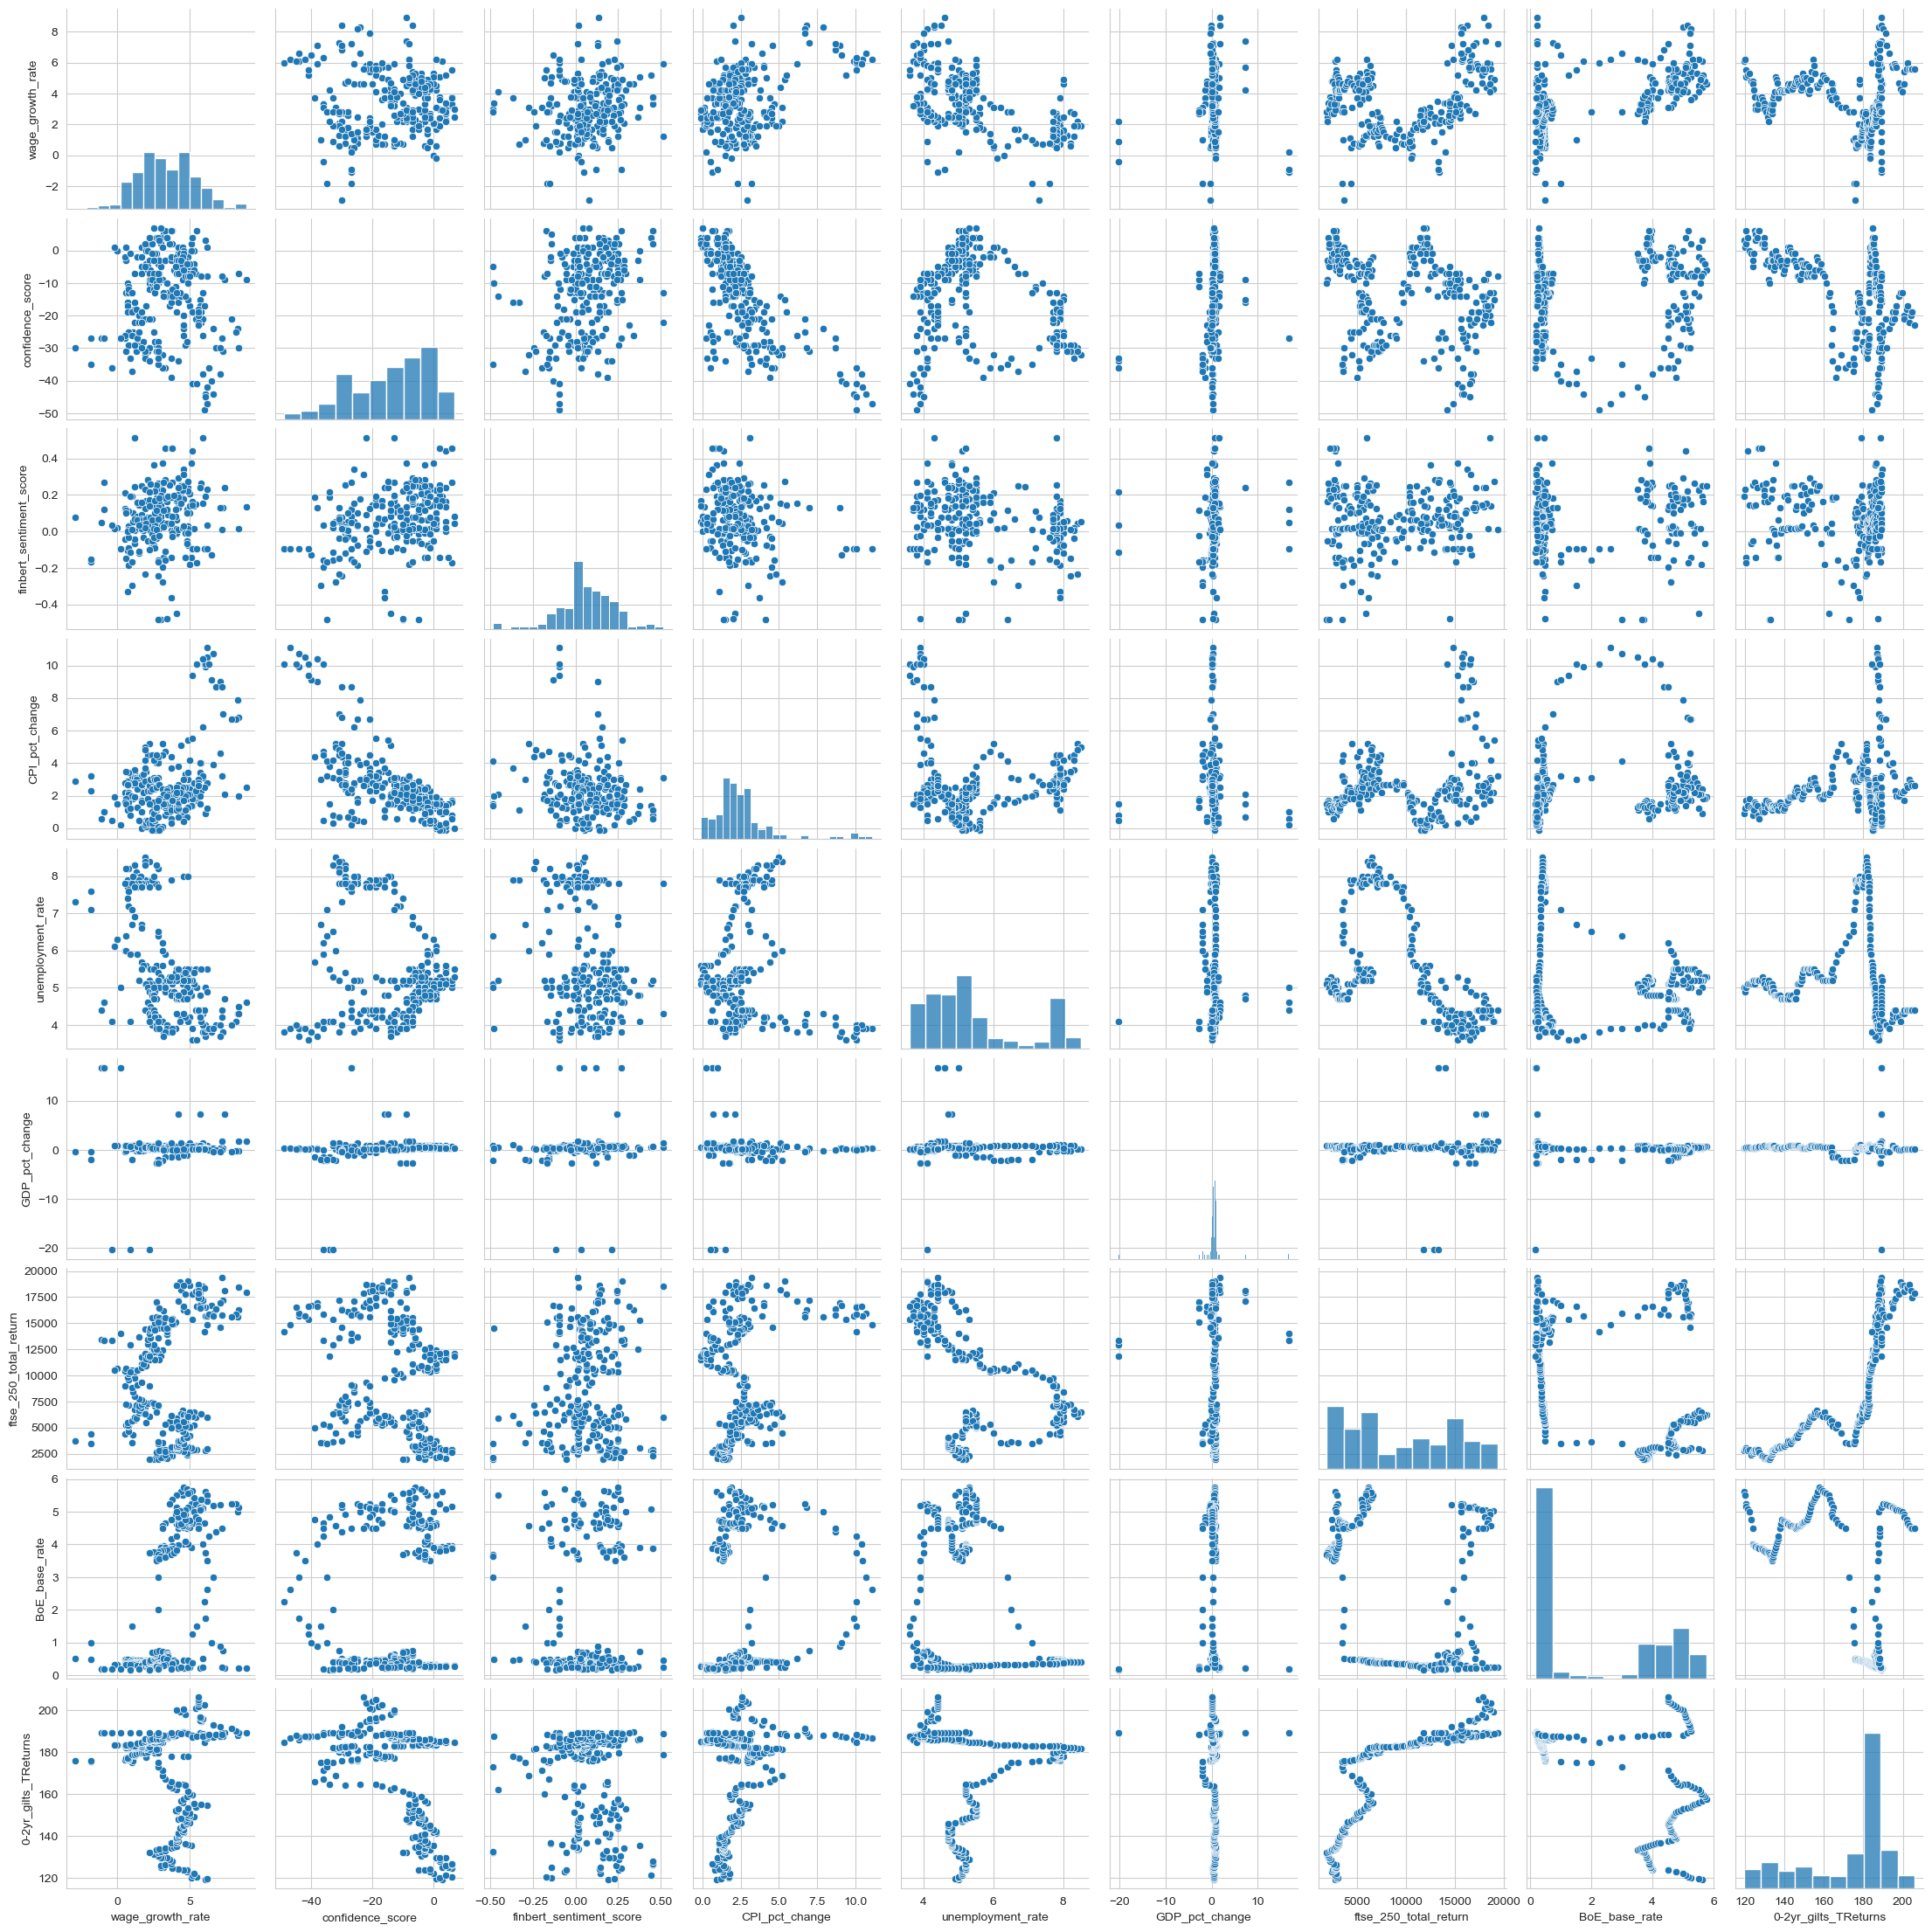

In [14]:
# Visualise the dataframe to pick out any direct relationships or specific distribution characteristics
sns.pairplot(df_uk_focused)

#### Create correlation matrices

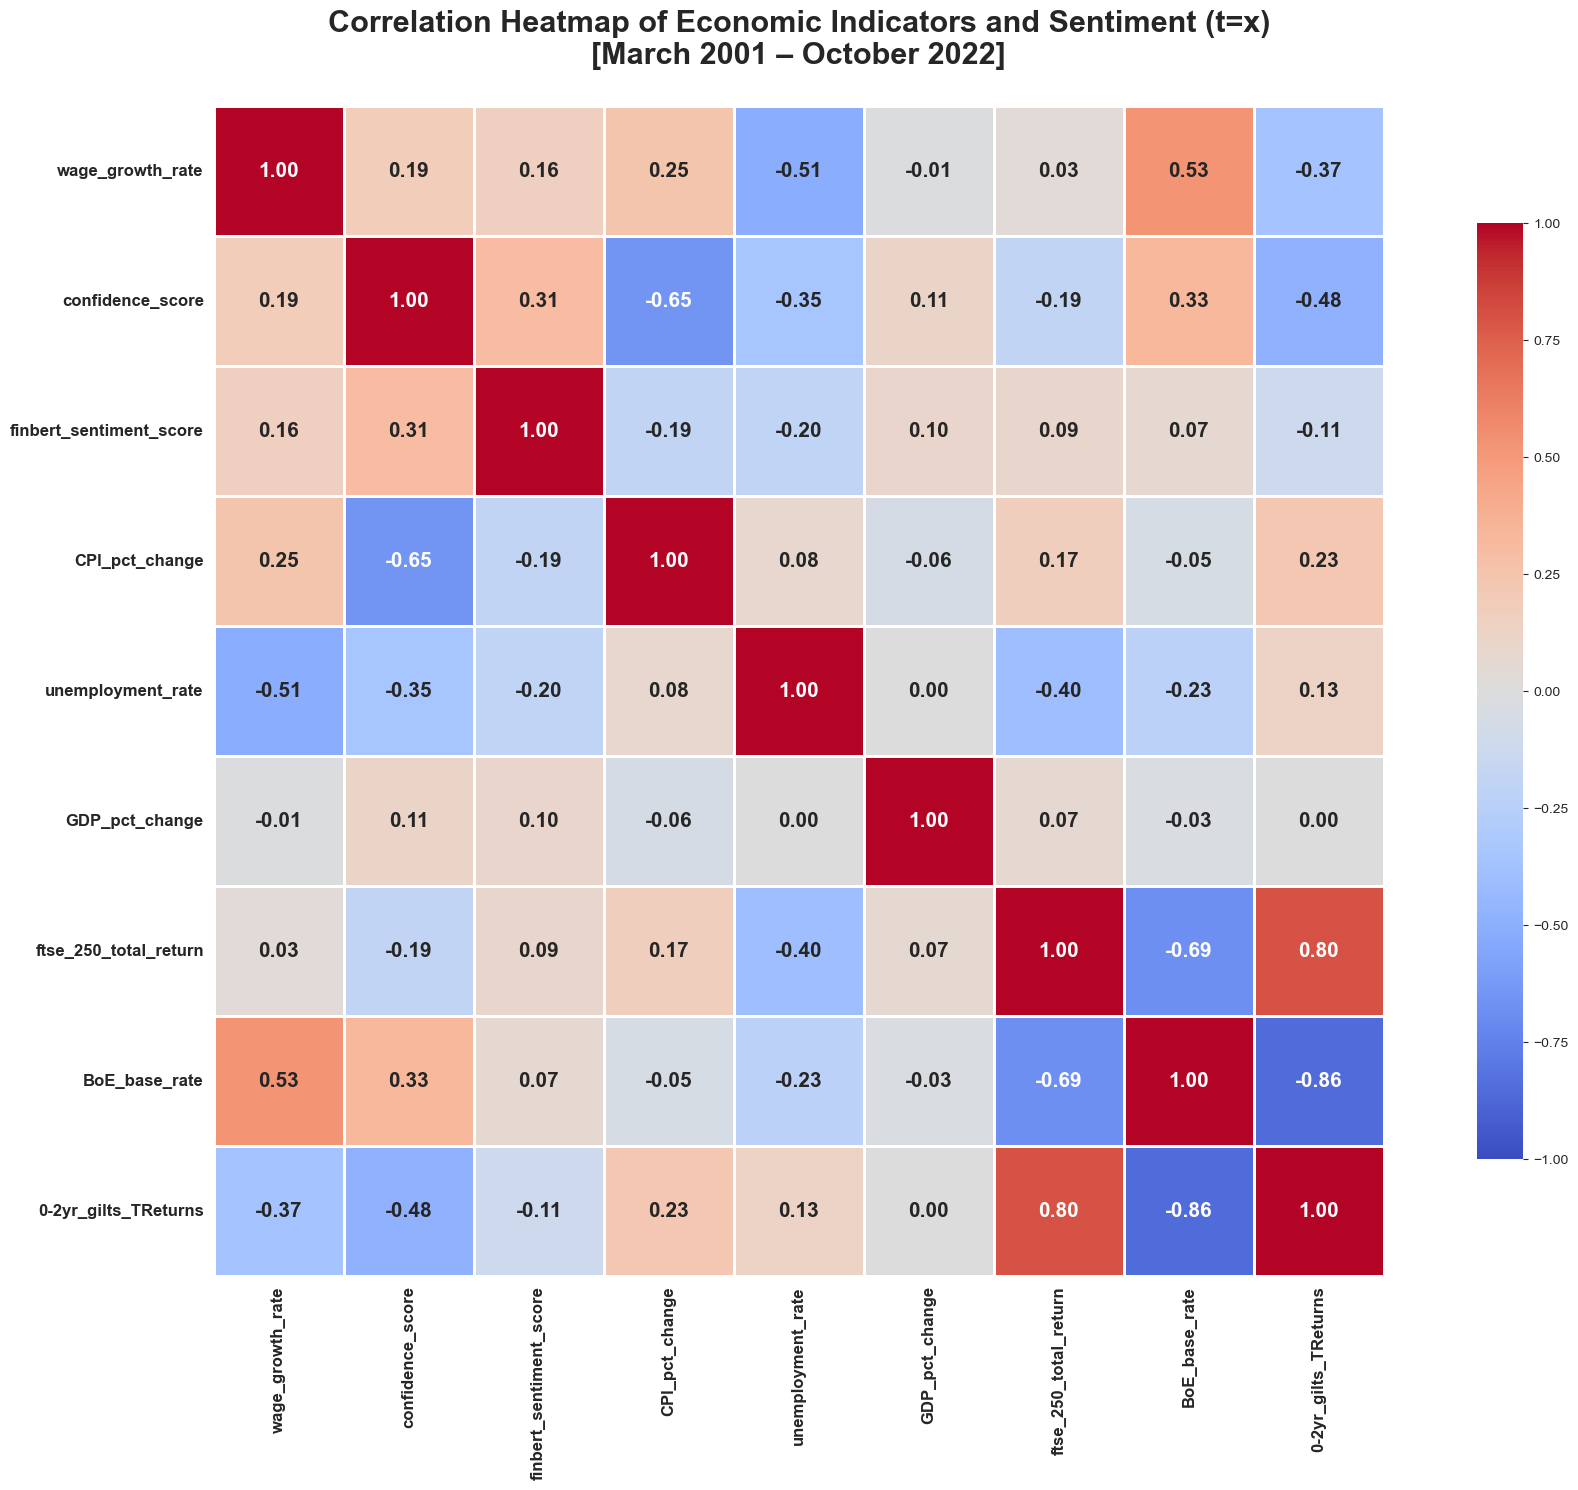

In [16]:
# --- Ensure date formatting ---
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], errors='coerce')

# --- Filter timeframe ---
start_date = "2001-03-01"
end_date = "2022-10-31"
filtered_df = df_uk_focused[
    (df_uk_focused['Date'] >= start_date) & 
    (df_uk_focused['Date'] <= end_date)
].copy()

# --- Correlation on numeric columns only ---
numeric_data = filtered_df.select_dtypes(include='number').dropna()
correlation_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(20, 15))
heatmap = sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    linewidths=1, 
    linecolor='white', 
    annot_kws={"size": 15, "weight": "bold"},
    cbar_kws={"shrink": 0.8},
    vmin=-1, 
    vmax=1,
    square=True
)

plt.title('Correlation Heatmap of Economic Indicators and Sentiment (t=x)\n[March 2001 – October 2022]', 
          fontsize=22, fontweight='bold', pad=30)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()

plt.show()

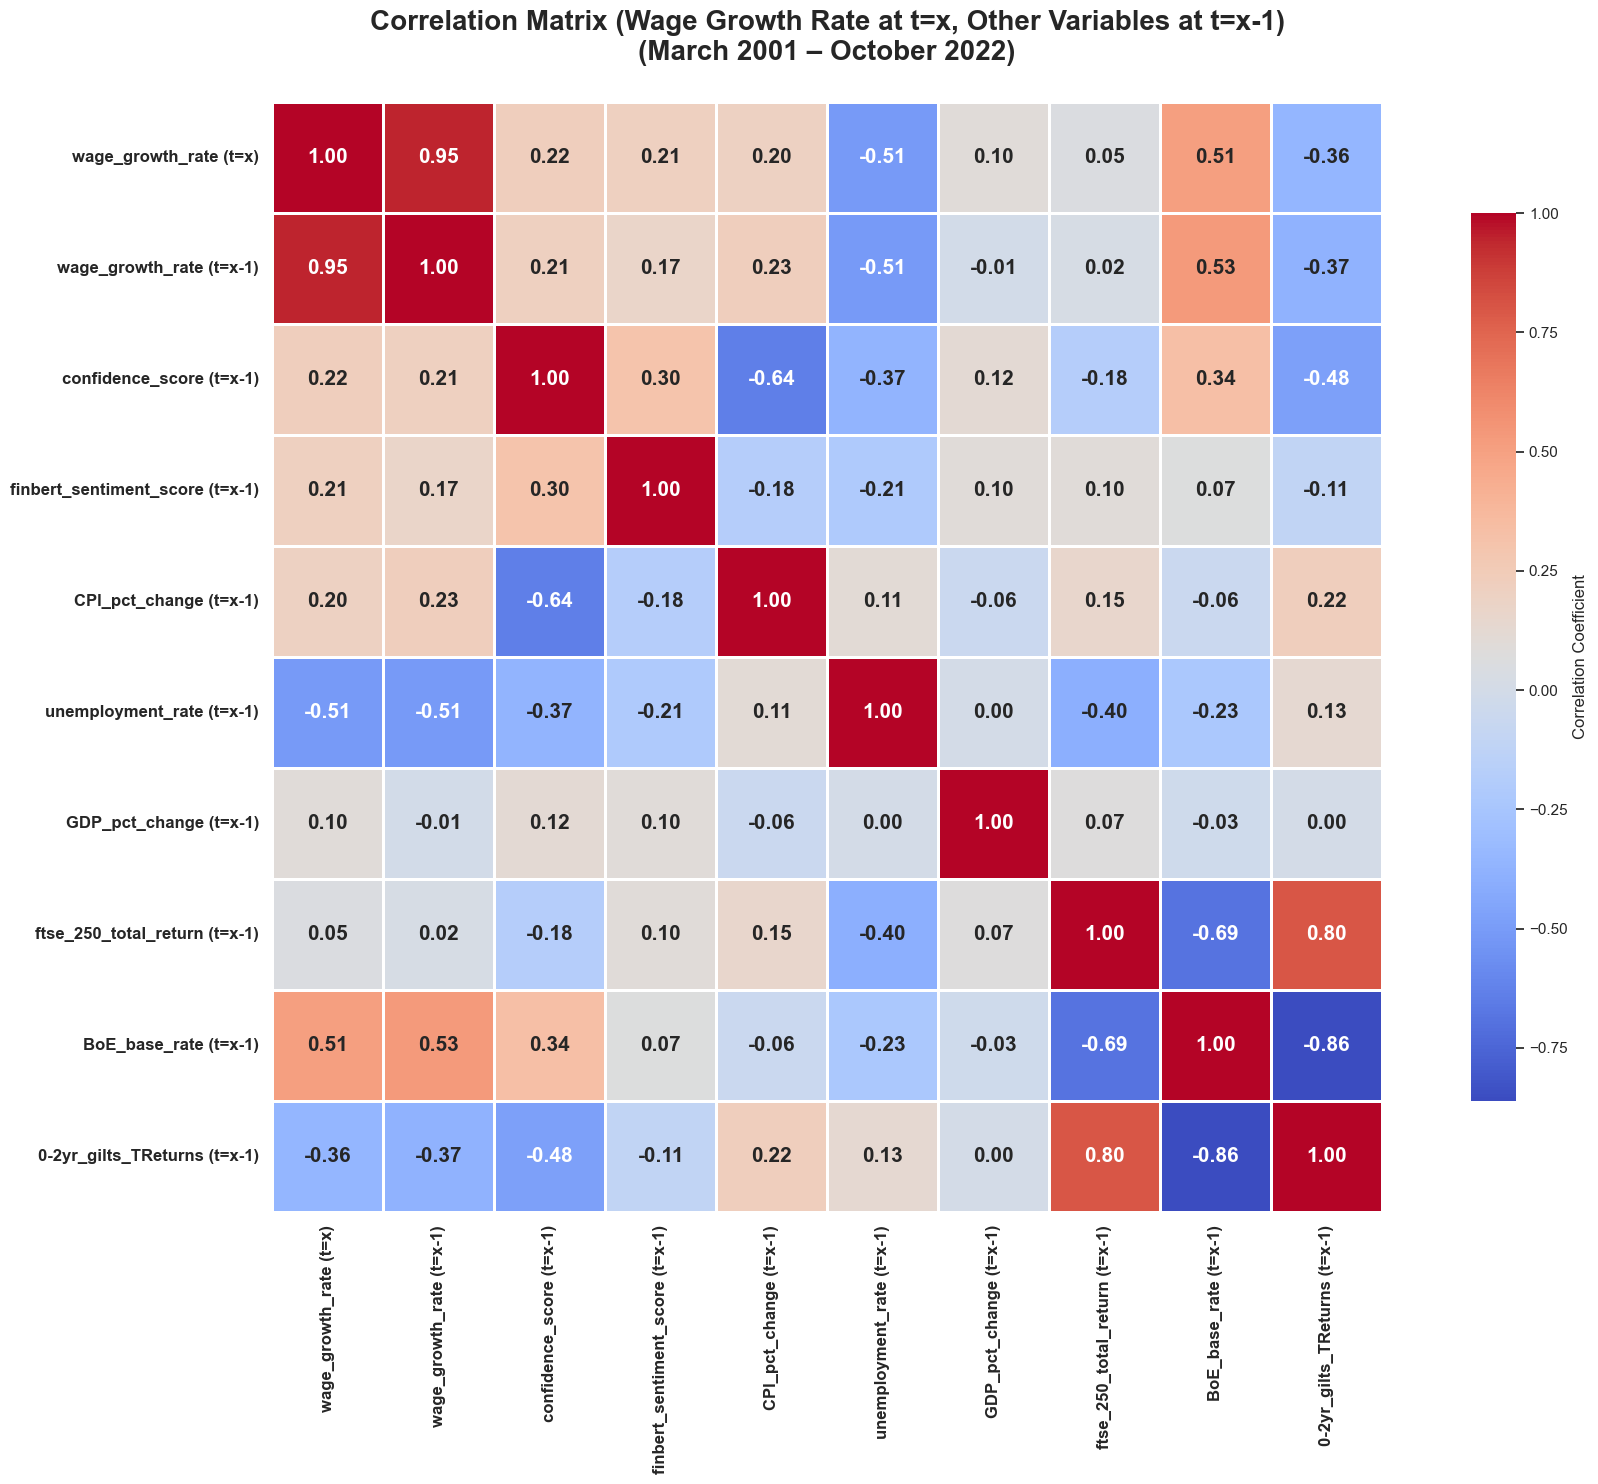

In [17]:
# Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])

# Define date range
start_date = "2001-03-01"
end_date = "2022-10-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()

# Define columns of interest
columns_of_interest = ['wage_growth_rate','confidence_score','finbert_sentiment_score',
    'CPI_pct_change',
    'unemployment_rate','GDP_pct_change',
    'ftse_250_total_return', 'BoE_base_rate', '0-2yr_gilts_TReturns'
]

# Start with confidence_score at t=0
correlation_df = filtered_df[['wage_growth_rate']].copy()
correlation_df.rename(columns={'wage_growth_rate': 'wage_growth_rate (t=x)'}, inplace=True)

# Add all other variables with a 1-month lag
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t=x-1)"] = filtered_df[col].shift(1)

# Drop missing rows due to lag
correlation_df.dropna(inplace=True)

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

#Plot
plt.figure(figsize=(20, 15))
sns.set(style="white")

heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 15, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
)

plt.title(
    "Correlation Matrix (Wage Growth Rate at t=x, Other Variables at t=x-1)\n(March 2001 – October 2022)",
    fontsize=20,
    fontweight='bold',
    pad=30
)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

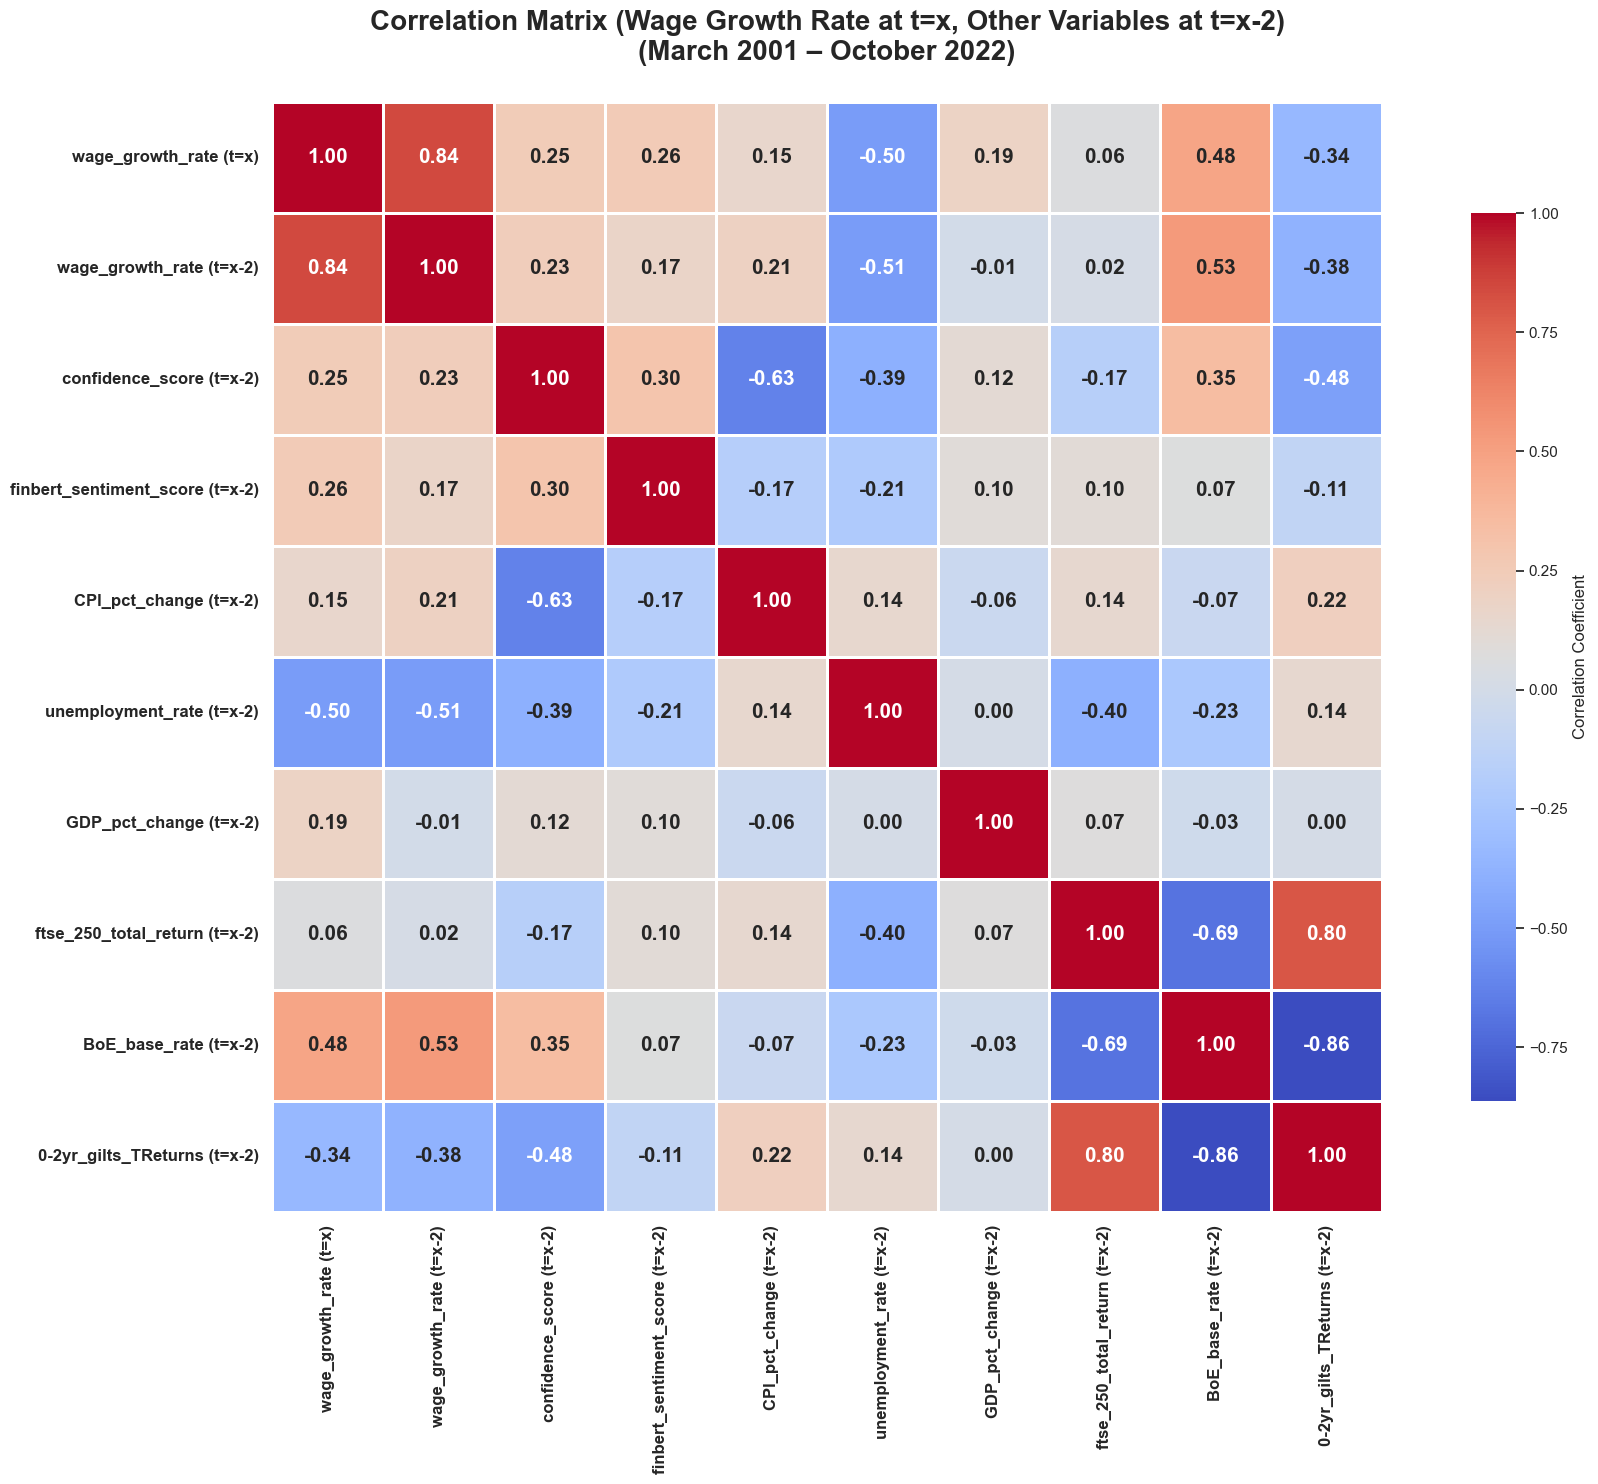

In [18]:
# Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])

# Define date range
start_date = "2001-03-01"
end_date = "2022-10-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()

# Define columns of interest
columns_of_interest = ['wage_growth_rate','confidence_score','finbert_sentiment_score',
    'CPI_pct_change',
    'unemployment_rate','GDP_pct_change',
    'ftse_250_total_return', 'BoE_base_rate', '0-2yr_gilts_TReturns'
]

# Start with confidence_score at t=0
correlation_df = filtered_df[['wage_growth_rate']].copy()
correlation_df.rename(columns={'wage_growth_rate': 'wage_growth_rate (t=x)'}, inplace=True)

# Add all other variables with a 2-month lag
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t=x-2)"] = filtered_df[col].shift(2)


# Drop missing rows due to lag
correlation_df.dropna(inplace=True)

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

#Plot
plt.figure(figsize=(20, 15))
sns.set(style="white")

heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 15, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
)

plt.title(
    "Correlation Matrix (Wage Growth Rate at t=x, Other Variables at t=x-2)\n(March 2001 – October 2022)",
    fontsize=20,
    fontweight='bold',
    pad=30
)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

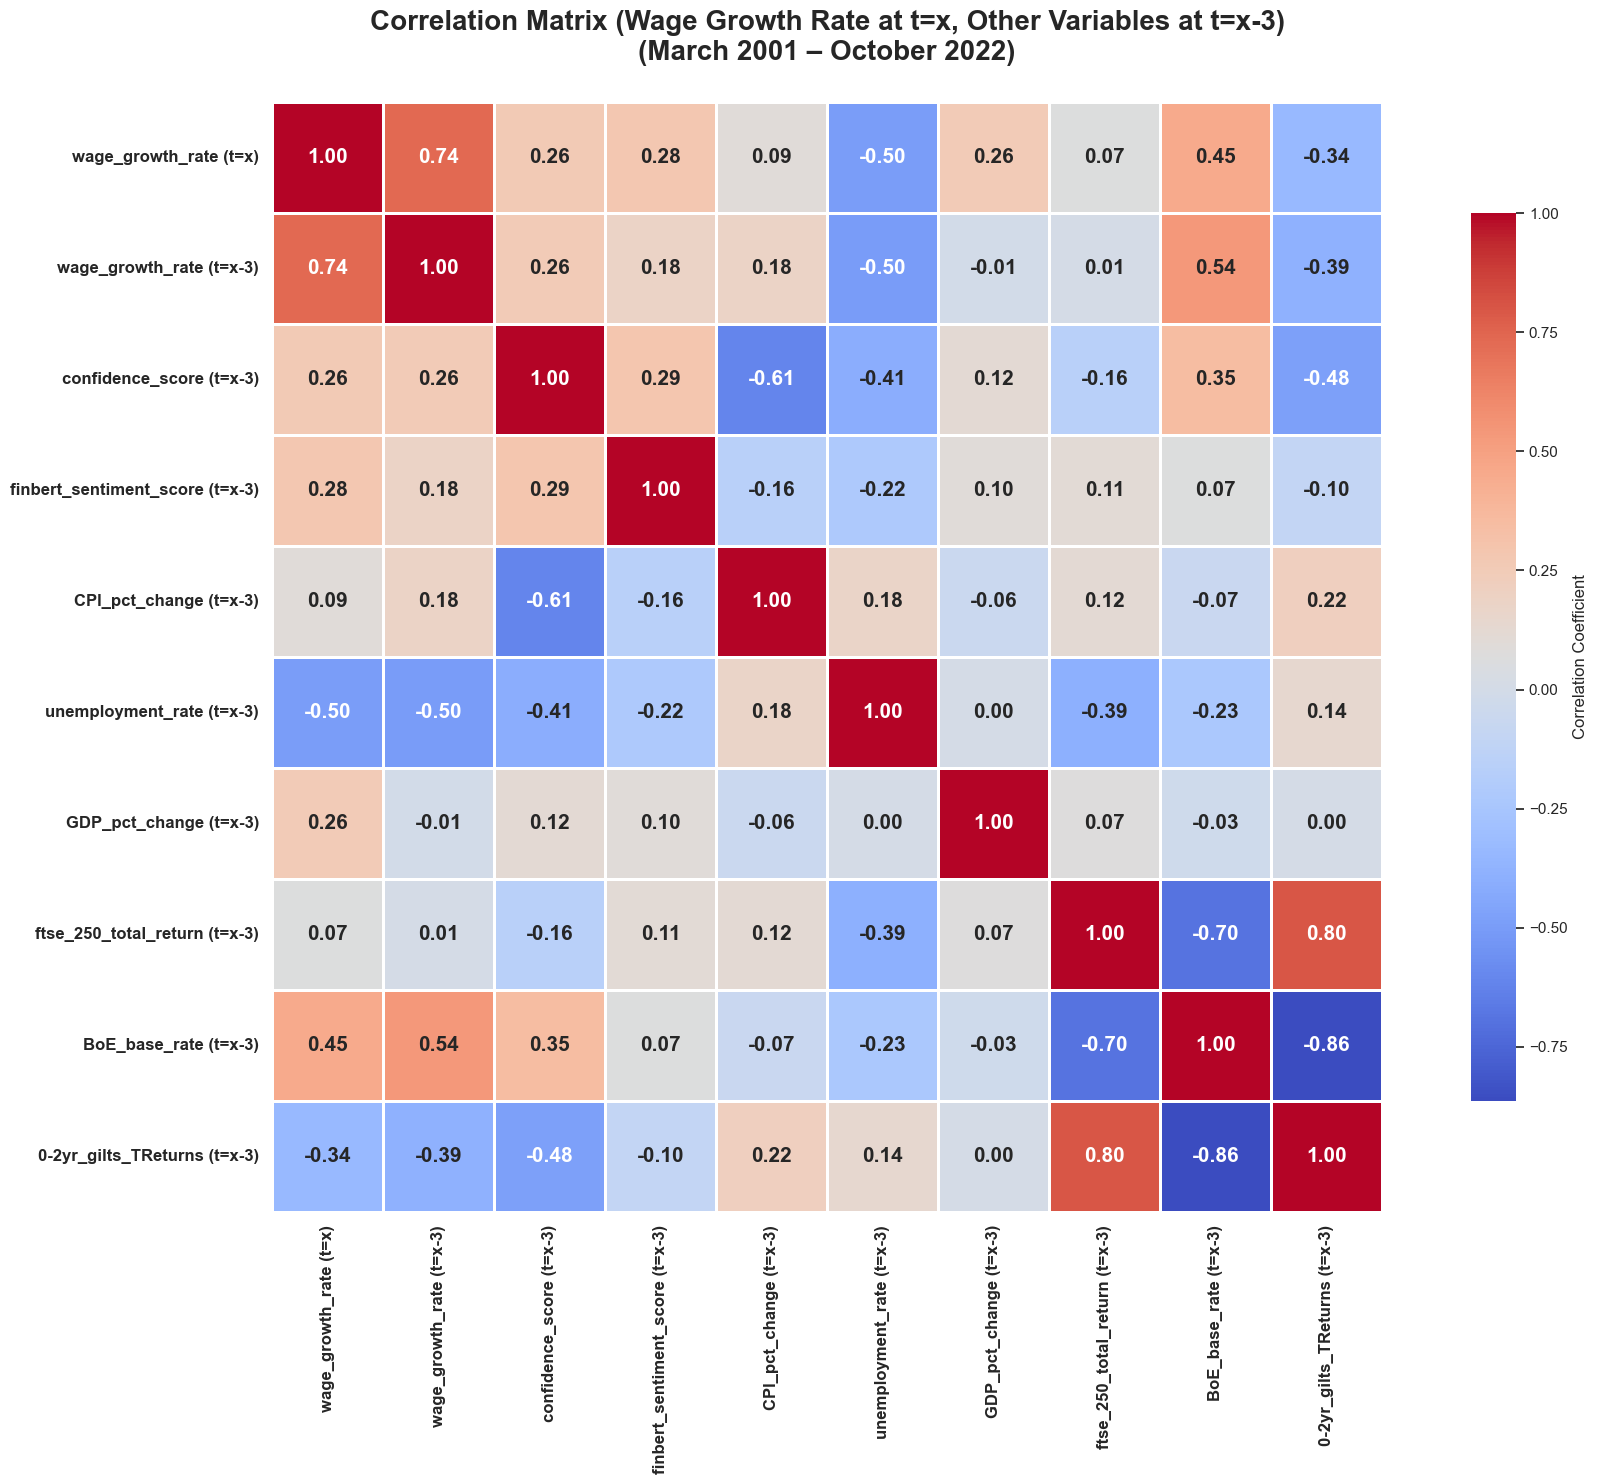

In [19]:
# Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])

# Define date range
start_date = "2001-03-01"
end_date = "2022-10-31"
filtered_df = df_uk_focused[(df_uk_focused['Date'] >= start_date) & (df_uk_focused['Date'] <= end_date)].copy()

# Define columns of interest
columns_of_interest = ['wage_growth_rate','confidence_score','finbert_sentiment_score',
    'CPI_pct_change',
    'unemployment_rate','GDP_pct_change',
    'ftse_250_total_return', 'BoE_base_rate', '0-2yr_gilts_TReturns'
]

# Start with confidence_score at t=0
correlation_df = filtered_df[['wage_growth_rate']].copy()
correlation_df.rename(columns={'wage_growth_rate': 'wage_growth_rate (t=x)'}, inplace=True)

# Add all other variables with a 3-month lag
for col in columns_of_interest:
    if col in filtered_df.columns:
        correlation_df[f"{col} (t=x-3)"] = filtered_df[col].shift(3)

# Drop missing rows due to lag
correlation_df.dropna(inplace=True)

# Compute correlation matrix
correlation_matrix = correlation_df.corr()

#Plot
plt.figure(figsize=(20, 15))
sns.set(style="white")

heatmap = sns.heatmap(
    correlation_matrix,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    annot_kws={"size": 15, "weight": "bold"},
    linewidths=1,
    linecolor='white',
    square=True,
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'},
)

plt.title(
    "Correlation Matrix (Wage Growth Rate at t=x, Other Variables at t=x-3)\n(March 2001 – October 2022)",
    fontsize=20,
    fontweight='bold',
    pad=30
)
plt.xticks(fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

#### Based on the correlation results, 0–2 year gilts total returns, BoE base rate, and unemployment rate were selected for further analysis. These variables consistently show the strongest relationships with the wage growth rate, particularly at current and recent time lags. The BoE base rate shows a strong positive correlation at t=0, unemployment rate has a notable negative correlation at both t=x and t=x-1, and 0–2 year gilts show moderate negative associations, suggesting meaningful influence on wage dynamics.

In [44]:
# Step 1: Parse date and filter timeframe
df_uk_focused['Date'] = pd.to_datetime(df_uk_focused['Date'], dayfirst=True, errors='coerce')
df_uk_focused = df_uk_focused.dropna(subset=['Date'])

start_date = "2001-03-01"
end_date = "2022-10-31"
filtered_df = df_uk_focused[
    (df_uk_focused['Date'] >= start_date) &
    (df_uk_focused['Date'] <= end_date)
].copy()

# Step 2: Create new DataFrame for regression
regression_df = pd.DataFrame()
regression_df['Date'] = filtered_df['Date']

# Add required variables with specific time lags
regression_df['wage_growth_rate (t=x)'] = filtered_df['wage_growth_rate']
regression_df['wage_growth_rate (t=x-1)'] = filtered_df['wage_growth_rate'].shift(1)
regression_df['BoE_base_rate (t=x-1)'] = filtered_df['BoE_base_rate'].shift(1)
regression_df['unemployment_rate (t=x-1)'] = filtered_df['unemployment_rate'].shift(1)
regression_df['0-2yr_gilts_TReturns (t=x-1)'] = filtered_df['0-2yr_gilts_TReturns'].shift(1)
regression_df['confidence_score (t=x-1)'] = filtered_df['confidence_score'].shift(1)

# Step 3: Drop rows with missing values due to shifting
regression_df.dropna(inplace=True)

# Step 4: View correlation matrix
correlation_matrix = regression_df.drop(columns='Date').corr()
display(correlation_matrix)

,wage_growth_rate (t=x),wage_growth_rate (t=x-1),BoE_base_rate (t=x-1),unemployment_rate (t=x-1),0-2yr_gilts_TReturns (t=x-1),confidence_score (t=x-1)
wage_growth_rate (t=x),1.000000,0.945979,0.506369,-0.506530,-0.356353,0.223133
wage_growth_rate (t=x-1),0.945979,1.000000,0.530112,-0.509453,-0.373782,0.208984
BoE_base_rate (t=x-1),0.506369,0.530112,1.000000,-0.233136,-0.860757,0.338080
unemployment_rate (t=x-1),-0.506530,-0.509453,-0.233136,1.000000,0.131071,-0.366989
0-2yr_gilts_TReturns (t=x-1),-0.356353,-0.373782,-0.860757,0.131071,1.000000,-0.480102
confidence_score (t=x-1),0.223133,0.208984,0.338080,-0.366989,-0.480102,1.000000


In [50]:
# Define dependent variable
y = regression_df['wage_growth_rate (t=x)']

# Define independent variables
X = regression_df[
    ['wage_growth_rate (t=x-1)','BoE_base_rate (t=x-1)', 'unemployment_rate (t=x-1)', 'confidence_score (t=x-1)',
     '0-2yr_gilts_TReturns (t=x-1)']
]

# Initialize and fit the model
mlr = LinearRegression()
mlr.fit(X, y)

# Print coefficients
coefficients = pd.Series(mlr.coef_, index=X.columns)
intercept = mlr.intercept_

print("Intercept:", intercept)
print("Coefficients:")
print(coefficients)

Intercept: 0.07523126115079748
Coefficients:
wage_growth_rate (t=x-1)        0.926261
BoE_base_rate (t=x-1)           0.019500
unemployment_rate (t=x-1)      -0.030566
confidence_score (t=x-1)        0.003612
0-2yr_gilts_TReturns (t=x-1)    0.001944
dtype: float64


In [52]:
LinearRegression()

LinearRegression()

In [54]:
# Call the predictions for X (array).
mlr.predict(X)

array([ 5.92510479,  6.01208846,  4.98971999,  5.37347122,  5.08549366,
        5.16353416,  4.69346449,  4.67569698,  4.48543582,  4.12193162,
        3.78056294,  3.21877529,  3.02602855,  3.03093134,  3.31642412,
        3.68761841,  3.76794276,  3.58036088,  3.40676569,  3.11814253,
        3.03178231,  2.82936885,  2.55277678,  2.25136342,  2.80614368,
        3.01226276,  3.30029829,  2.74173636,  2.74462419,  2.92706188,
        3.29973964,  3.67448045,  3.85091448,  4.04554134,  4.99206466,
        4.80237427,  4.61579424,  3.69532458,  4.06765612,  4.15941673,
        4.07664536,  4.07342406,  4.06705959,  4.16394139,  4.17219994,
        4.26893202,  4.18812717,  4.55794402,  4.46980699,  4.5568184 ,
        4.27680212,  4.45909837,  4.5591022 ,  4.73437204,  4.91104404,
        4.71001103,  4.61885477,  4.43171903,  4.17348853,  4.35641768,
        4.80675582,  5.18597076,  4.90276148,  4.81508307,  4.90937924,
        4.61819614,  4.06867023,  3.98899781,  4.16680567,  4.81

In [56]:
# Checking the value of R-squared, intercept and coefficients.
# For linear regression models in scikit-learn, the score() method returns the R-squared (coefficient of determination) value.

print("R-squared: ", mlr.score(X, y))
print("Intercept: ", mlr.intercept_)
print("Coefficients:")

list(zip(X, mlr.coef_))


R-squared:  0.8961339066838606
Intercept:  0.07523126115079748
Coefficients:


[('wage_growth_rate (t=x-1)', 0.9262608048236102),
 ('BoE_base_rate (t=x-1)', 0.019499939436483267),
 ('unemployment_rate (t=x-1)', -0.030566337666059373),
 ('confidence_score (t=x-1)', 0.003612007084175947),
 ('0-2yr_gilts_TReturns (t=x-1)', 0.0019443747356710258)]

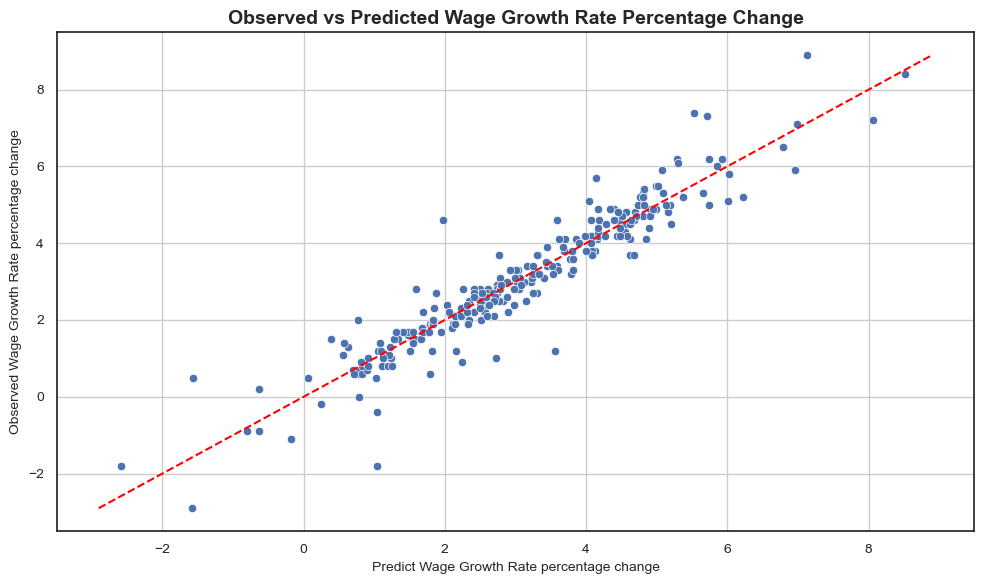

In [58]:
# Plot observed vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=mlr.predict(X), y=regression_df['wage_growth_rate (t=x)'])

# Add Line of best fit (y = x)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')

# Axis labels
plt.xlabel('Predict Wage Growth Rate percentage change', fontsize=10)
plt.ylabel('Observed Wage Growth Rate percentage change', fontsize=10)

# Title
plt.title('Observed vs Predicted Wage Growth Rate Percentage Change', fontsize=14, fontweight='bold')

# Tick label size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Final layout
plt.grid(True)
plt.tight_layout()
plt.show()

### Training and testing subsets with MLR

In [61]:
# Create train and test data sets.
# Split the data in 'train' (80%) and 'test' (20%) sets, which is the recommended ratio to prevent overfitting
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [63]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model1 = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Set the predicted response vector i.e. calculate and store the model's predictions for the target variable (y) based on the test data.
Y_pred = model1.predict(sm.add_constant(x_test)) 
# sm.add_constant(x_test): This adds a constant term (intercept) to the x_test data. This is important because the model was trained with a constant, so it expects input data to also have a constant term for predictions.

# Call a summary of the model.
print_model = model1.summary()

# Print the summary.
print(print_model) 

                              OLS Regression Results                              
Dep. Variable:     wage_growth_rate (t=x)   R-squared:                       0.897
Model:                                OLS   Adj. R-squared:                  0.895
Method:                     Least Squares   F-statistic:                     354.2
Date:                    Mon, 19 May 2025   Prob (F-statistic):           3.64e-98
Time:                            12:11:57   Log-Likelihood:                -181.28
No. Observations:                     209   AIC:                             374.6
Df Residuals:                         203   BIC:                             394.6
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

#### The model explains wage growth well, with an R² of 0.897, indicating that nearly 90% of the variation in current wage growth is explained by the selected predictors. The most significant driver is lagged wage growth (t-1) with a large coefficient (0.943) and a highly significant p-value (<0.001). Other variables like BoE base rate, unemployment rate, confidence score and 2-yr gilts returns are not statistically significant, suggesting their individual contributions to explaining wage growth are limited in this specification. JB p-value suggests heteroskedasticity exists. The high condition number suggests potential multicollinearity, so further diagnostics may be needed. No autocorrelation as Durbin Watson close to 2.

In [68]:
# Run regression on the training subset
# Specify the model
mlr = LinearRegression()  

# Fit the model.
mlr.fit(x_train, y_train)

LinearRegression()

In [70]:
# Call the predictions for X in the train set.
y_pred_train = mlr.predict(x_train)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_train)) 

Prediction for test set: [ 2.09551465  1.73317616 -2.65272419 -0.83680121  4.80781939  3.74864715
  4.70634833  2.20929177  2.08485319  3.02677801  3.78984985  2.56016902
  4.04983003  1.14154606  0.79506089  1.03043569  4.76095496  2.63495562
  2.18255696  1.50906065  2.14976473  2.73295687  2.61925529  0.94506808
  4.04747416  3.644938    2.54515224  1.0527079   4.8140306   4.96657193
  2.71992296  5.06569808  2.33888746  0.64157144  1.85585832  4.88377149
 -1.60743666  2.89526974  2.34724264  2.5666961   0.37597562  0.85257716
  5.14785966  4.61366077  1.69481055  3.04072875  2.14961008  4.61701337
  2.18522495  4.49767382  3.29191973  0.81132644  3.65465887  2.99016164
  4.80108327  2.71249663  4.04037968  1.34747547  4.76437038  2.73629952
  2.50996687  0.58108195  2.73913775  2.38880321  7.08497314  4.44999238
  1.24885767  2.36193094 -1.63030044  4.0565881   3.02900155  4.56074214
  1.58421461  4.04756643  2.44827407  0.83911139  3.27377387  6.86753694
  1.73298128  5.91447406  

In [72]:
# Call the predictions for x in the test set.
y_pred_train = mlr.predict(x_test)  

# Print the predictions.
print("Prediction for test set: {}".format(y_pred_train)) 

Prediction for test set: [ 7.07945271  3.56915531  2.45523531  1.9836163   4.05724688  1.69986096
  3.15011253  5.89900254  4.10198687  1.53990145  2.76452833  3.38419696
  4.17356039  2.7409783   2.26838377  5.15283707  4.93799951  4.67222246
  2.54993032  3.97616258  1.54143098  1.73298128  3.08792311  3.49006305
  1.07344778  0.92637534  5.12985759  4.1559652   3.03763705  3.66858176
  3.27451811  2.26429239  2.25241719  3.63016351  4.02923287  2.75010516
  5.21128818  2.80683551  2.65355483  3.75948835  5.83236043  4.25140333
  1.91337051  4.38205055  2.97854343  0.26095158 -0.20949526  3.38385505
  4.56333101  1.22738233  8.6748523   2.4713625   1.362209  ]


In [74]:
# Print the R-squared value.
print(mlr.score(x_test, y_test)*100) 

88.80454997789504


#### The multiple linear regression model explains 88.8% of the variability in the wage growth rate (at time t). This indicates a very strong fit, meaning the independent variables collectively account for nearly 89% of the changes in wage growth.

### Check for multicollinearity

In [78]:
# Check multicollinearity.
# Why need to keep adding constant? Because we're using the Statsmodel library, which requires us to do so, 
# whereas the Scikit-learn already assumes that the regression has a constant by default
x_temp = sm.add_constant(x_train)

# Create an empty DataFrame. 
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values,
                                               i) for i in range(x_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = x_temp.columns

# Print the values to one decimal points.
print(vif.round(1))

   VIF Factor                      features
0       478.6                         const
1         1.9      wage_growth_rate (t=x-1)
2         5.6         BoE_base_rate (t=x-1)
3         1.7     unemployment_rate (t=x-1)
4         1.7      confidence_score (t=x-1)
5         5.6  0-2yr_gilts_TReturns (t=x-1)


#### The VIF analysis indicates that multicollinearity is generally not a serious concern in the model. Most predictors have low VIF values, while BoE rate adn and 2-year gilts total returns have higher VIF score. 

#### The intercept term ("const") has a very high VIF, which is expected and not problematic. Overall, the predictors do not exhibit problematic multicollinearity, although the BoE base rate may warrant closer attention if model stability becomes an issue.

### Check for heteroscedasticity

In [81]:
# Determine heteroscedasticity.
model2 = sms.het_breuschpagan(model1.resid, model1.model.exog) 

In [83]:
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model2)))

{'LM stat': 13.005569989891418, 'LM Test p-value': 0.023326627148487246, 'F-stat': 2.694087487906459, 'F-test p-value': 0.022119958538463335}


#### Since both p-values are less than 0.05, we reject the null hypothesis. In the context of the Breusch-Pagan test, the null hypothesis is that there is no heteroscedasticity.

#### Therefore, based on this Breusch-Pagan test output, we conclude that there is statistically significant evidence of heteroscedasticity in the data.

### Check normality of regression residuals - assumption of MLR

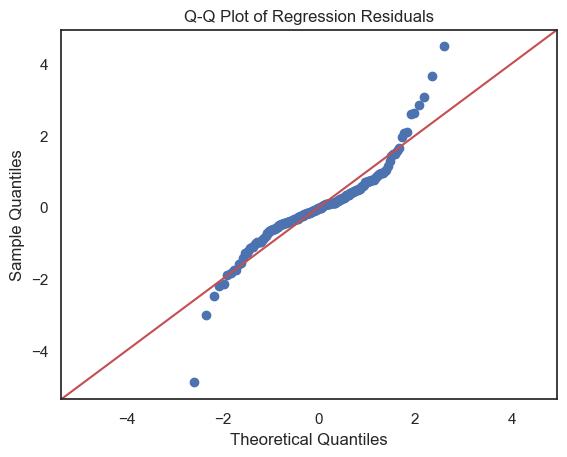

In [89]:
# Q-Q plot of residuals
sm.qqplot(model1.resid, line='45', fit=True)
plt.title("Q-Q Plot of Regression Residuals")
plt.show()

#### The Q-Q plot shows that most residuals lie along the 45-degree line, but dispersion increases significantly at both ends of the scatter plot range, indicating that those residuals veer further away from normal distribution. Overall, normality of residuals appears reasonably acceptable.

### Evaluate the model

In [93]:
# Call the metrics.mean_absolute_error function.  
print('Mean Absolute Error (Final):', metrics.mean_absolute_error(y_test, Y_pred))  

# Call the metrics.mean_squared_error function.
print('Mean Square Error (Final):', metrics.mean_squared_error(y_test, Y_pred))  

Mean Absolute Error (Final): 0.3817471893544469
Mean Square Error (Final): 0.3241881887034473


#### The model performs well, with a Mean Absolute Error (MAE) of 0.374 and a Mean Squared Error (MSE) of 0.319. These low error values indicate that the model’s predictions are closely aligned with the actual wage growth rates on average.

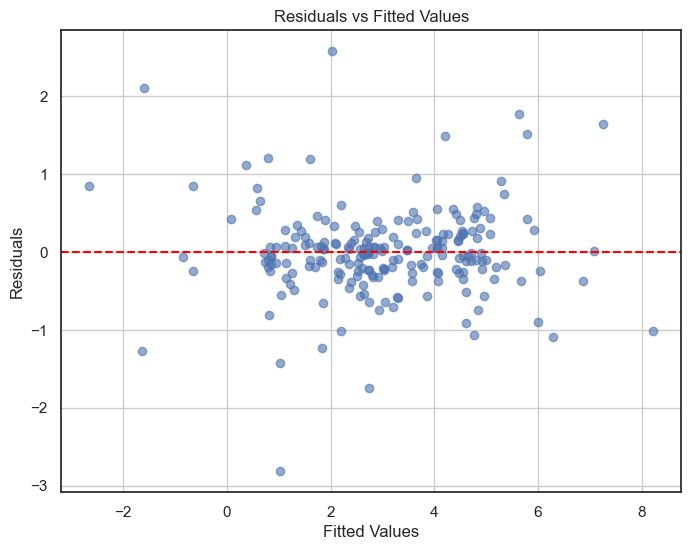

In [96]:
# Fitted values from statsmodels
fitted_vals = model1.fittedvalues
residuals = model1.resid

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(fitted_vals, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values")
plt.grid(True)
plt.show()


#### The residuals vs. fitted values plot shows a fairly random scatter around the horizontal line at zero, suggesting that the model’s residuals have constant variance (homoskedasticity) and no obvious patterns. This supports the assumption of linearity and a well-specified model.

### Multiple linear regression: Drop base rate, and 0-2 Year Gilts as variables and explore transformation of dependent variable

### Re-perform MLR

In [142]:
# Define dependent variable
y = regression_df['wage_growth_rate (t=x)']

# Define independent variables
X = regression_df[
    ['wage_growth_rate (t=x-1)']
]

# Specify the model
mlr = LinearRegression()

# Fit the model
mlr.fit(X, y)

LinearRegression()

In [144]:
# Call the predictions for X (array).
mlr.predict(X)

array([ 5.93708359,  6.03171679,  4.99075155,  5.36928437,  5.08538476,
        5.18001796,  4.70685194,  4.70685194,  4.51758553,  4.13905272,
        3.7605199 ,  3.19272068,  3.00345427,  3.00345427,  3.28735388,
        3.6658867 ,  3.7605199 ,  3.5712535 ,  3.38198709,  3.09808748,
        3.00345427,  2.81418787,  2.53028825,  2.24638864,  2.81418787,
        3.00345427,  3.28735388,  2.71955466,  2.71955466,  2.90882107,
        3.28735388,  3.6658867 ,  3.85515311,  4.04441951,  4.99075155,
        4.80148514,  4.61221874,  3.6658867 ,  4.04441951,  4.13905272,
        4.04441951,  4.04441951,  4.04441951,  4.13905272,  4.13905272,
        4.23368592,  4.13905272,  4.51758553,  4.42295233,  4.51758553,
        4.23368592,  4.42295233,  4.51758553,  4.70685194,  4.89611835,
        4.70685194,  4.61221874,  4.42295233,  4.13905272,  4.32831913,
        4.80148514,  5.18001796,  4.89611835,  4.80148514,  4.89611835,
        4.61221874,  4.04441951,  3.94978631,  4.13905272,  4.80

In [146]:
# Checking the value of R-squared, intercept and coefficients.
# For linear regression models in scikit-learn, the score() method returns the R-squared (coefficient of determination) value.

print("R-squared: ", mlr.score(X, y))
print("Intercept: ", mlr.intercept_)
print("Coefficients:")

list(zip(X, mlr.coef_))

R-squared:  0.8948759883014075
Intercept:  0.16445815949101839
Coefficients:


[('wage_growth_rate (t=x-1)', 0.9463320377195421)]

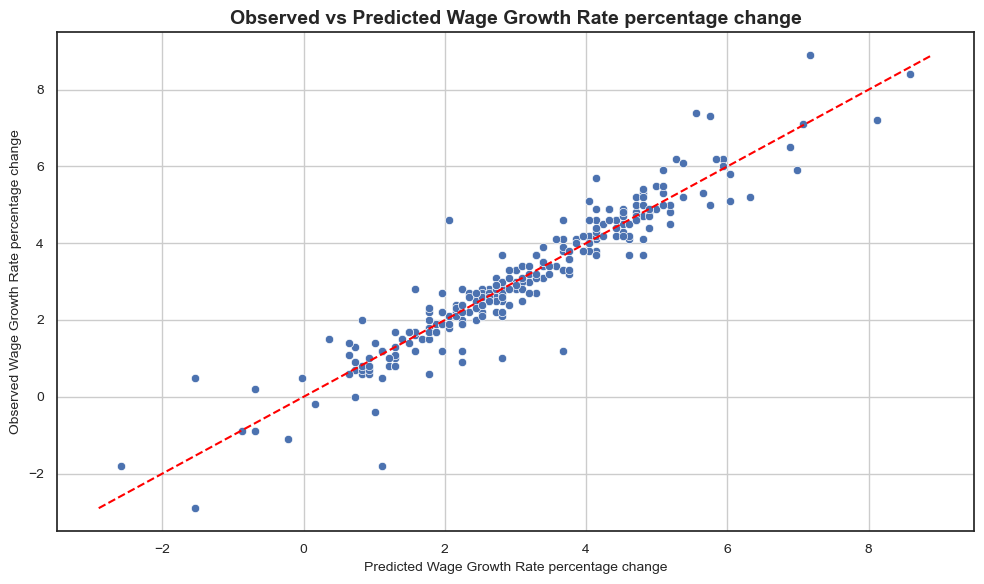

In [148]:
# Plot observed vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=mlr.predict(X), y=regression_df['wage_growth_rate (t=x)'])

# Add Line of best fit (y = x)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')

# Axis labels
plt.xlabel('Predicted Wage Growth Rate percentage change', fontsize=10)
plt.ylabel('Observed Wage Growth Rate percentage change', fontsize=10)

# Title
plt.title('Observed vs Predicted Wage Growth Rate percentage change', fontsize=14, fontweight='bold')

# Tick label size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Final layout
plt.grid(True)
plt.tight_layout()
plt.show()

### Training and testing subsets with MLR

In [151]:
# Create train and test data sets.
# Split the data in 'train' (80%) and 'test' (20%) sets, which is the recommended ratio to prevent overfitting
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

In [153]:
# Training the model using the 'statsmodel' OLS library.
# Fit the model with the added constant.
model3 = sm.OLS(y_train, sm.add_constant(x_train)).fit()

# Set the predicted response vector i.e. calculate and store the model's predictions for the target variable (y) based on the test data.
Y_pred = model3.predict(sm.add_constant(x_test)) 
# sm.add_constant(x_test): This adds a constant term (intercept) to the x_test data. This is important because the model was trained with a constant, so it expects input data to also have a constant term for predictions.

# Call a summary of the model.
print_model = model3.summary()

# Print the summary.
print(print_model)  

                              OLS Regression Results                              
Dep. Variable:     wage_growth_rate (t=x)   R-squared:                       0.896
Model:                                OLS   Adj. R-squared:                  0.895
Method:                     Least Squares   F-statistic:                     1777.
Date:                    Mon, 19 May 2025   Prob (F-statistic):          1.49e-103
Time:                            12:19:34   Log-Likelihood:                -182.78
No. Observations:                     209   AIC:                             369.6
Df Residuals:                         207   BIC:                             376.2
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [155]:
# Check multicollinearity.
# Why need to keep adding constant? Because we're using the Statsmodel library, which requires us to do so, 
# whereas the Scikit-learn already assumes that the regression has a constant by default
x_temp = sm.add_constant(x_train)

# Create an empty DataFrame. 
vif = pd.DataFrame()

# Calculate the VIF for each value.
vif['VIF Factor'] = [variance_inflation_factor(x_temp.values,
                                               i) for i in range(x_temp.values.shape[1])]

# Create the feature columns.
vif['features'] = x_temp.columns

# Print the values to one decimal points.
print(vif.round(1))

   VIF Factor                  features
0         3.8                     const
1         1.0  wage_growth_rate (t=x-1)


In [157]:
# Determine heteroscedasticity.
model4 = sms.het_breuschpagan(model3.resid, model3.model.exog)

In [159]:
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model4)))

{'LM stat': 1.1041964811945306, 'LM Test p-value': 0.2933469931831476, 'F-stat': 1.0994386021197031, 'F-test p-value': 0.295612033956438}


#### The regression model shows a strong fit with an R-squared of 0.896, indicating that nearly 90% of the variation in wage growth is explained by the included predictors. Wage growth rate (t=x-1) is statistically significant (p < 0.001).VIF value is low (1), suggesting no multicollinearity concerns.The Breusch-Pagan test p-values (LM: 0.29, F: 0.29) indicate no sufficient evidence to reject null hypothesis of no heteroskedasticity, supporting the assumption of constant variance in residuals.

In [162]:
regression_df.describe()

,Date,wage_growth_rate (t=x),wage_growth_rate (t=x-1),BoE_base_rate (t=x-1),unemployment_rate (t=x-1),0-2yr_gilts_TReturns (t=x-1),confidence_score (t=x-1)
count,262,262.000000,262.000000,262.000000,262.000000,262.000000,262.000000
mean,2012-01-18 05:02:17.404580096,3.057634,3.057252,1.895460,5.579389,169.476966,-12.557252
min,2001-04-01 00:00:00,-2.900000,-2.900000,0.175000,3.600000,119.314000,-49.000000
25%,2006-09-08 12:00:00,1.900000,1.900000,0.337781,4.700000,151.294750,-22.000000
50%,2012-02-15 12:00:00,2.900000,2.900000,0.478984,5.200000,181.949000,-9.000000
75%,2017-05-24 06:00:00,4.375000,4.375000,3.995833,6.400000,186.024000,-3.000000
max,2022-10-01 00:00:00,8.900000,8.900000,5.750000,8.500000,189.413000,7.000000
std,NaN,1.781966,1.781301,2.019321,1.378445,21.832248,12.294696


In [164]:
regression_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 262 entries, 137 to 398
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date                          262 non-null    datetime64[ns]
 1   wage_growth_rate (t=x)        262 non-null    float64       
 2   wage_growth_rate (t=x-1)      262 non-null    float64       
 3   BoE_base_rate (t=x-1)         262 non-null    float64       
 4   unemployment_rate (t=x-1)     262 non-null    float64       
 5   0-2yr_gilts_TReturns (t=x-1)  262 non-null    float64       
 6   confidence_score (t=x-1)      262 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 16.4 KB


In [166]:
regression_df.head()

,Date,wage_growth_rate (t=x),wage_growth_rate (t=x-1),BoE_base_rate (t=x-1),unemployment_rate (t=x-1),0-2yr_gilts_TReturns (t=x-1),confidence_score (t=x-1)
137,2001-04-01,6.2,6.1,5.625000,5.0,119.314,3.0
138,2001-05-01,5.1,6.2,5.500000,4.9,119.809,1.0
139,2001-06-01,5.5,5.1,5.250000,5.0,120.240,2.0
140,2001-07-01,5.2,5.5,5.166667,5.0,120.458,6.0
141,2001-08-01,5.3,5.2,5.083333,5.1,121.387,4.0


Root Mean Squared Error: 0.6933
Mean Squared Error: 0.4807
Mean Absolute Error: 0.4520
R² Score: 0.8479


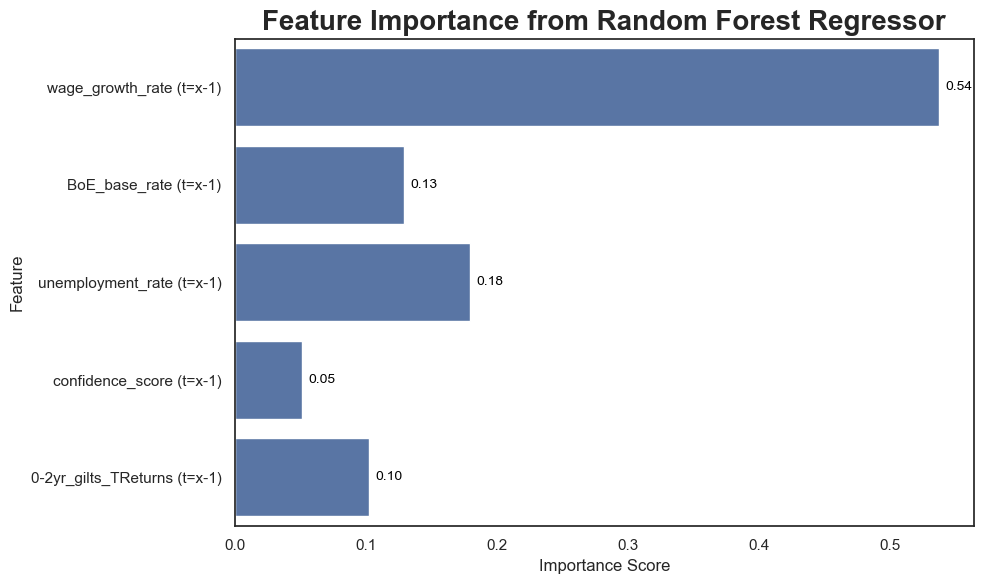

In [170]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Import pandas


# 1. Prepare the data
# -------------------
regression_df = regression_df.dropna(
    subset=['wage_growth_rate (t=x)','wage_growth_rate (t=x-1)','BoE_base_rate (t=x-1)', 'unemployment_rate (t=x-1)', 'confidence_score (t=x-1)',
     '0-2yr_gilts_TReturns (t=x-1)'

])
# Define dependent variable
y = regression_df['wage_growth_rate (t=x)']

# Define independent variables
X = regression_df[
    [
'wage_growth_rate (t=x-1)','BoE_base_rate (t=x-1)', 'unemployment_rate (t=x-1)', 'confidence_score (t=x-1)',
     '0-2yr_gilts_TReturns (t=x-1)'

    ]
]
y = regression_df['wage_growth_rate (t=x)']

# 2. Train-test split
# -------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Build and train the Random Forest model
# ------------------------------------------
rf_model = RandomForestRegressor(
    n_estimators=200,
    min_samples_split=2,
    min_samples_leaf=2,
    max_features='sqrt',
    bootstrap=True,
    n_jobs=-1,
    random_state=42,
)

rf_model.fit(X_train, y_train)

# 4. Predictions and Evaluation
# -----------------------------
y_pred = rf_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# 5. Feature Importance Plot
# --------------------------
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importance from Random Forest Regressor", fontsize=20, fontweight='bold')
plt.xlabel("Importance Score")
plt.ylabel("Feature")

for i, (value, name) in enumerate(zip(feature_importances, feature_importances.index)):
    ax.text(value + 0.005, i, f"{value:.2f}", color='black', va='center', fontsize=10)

plt.tight_layout()
plt.show()

Root Mean Squared Error: 0.5351
Mean Squared Error: 0.2863
Mean Absolute Error: 0.3653
R² Score: 0.9094


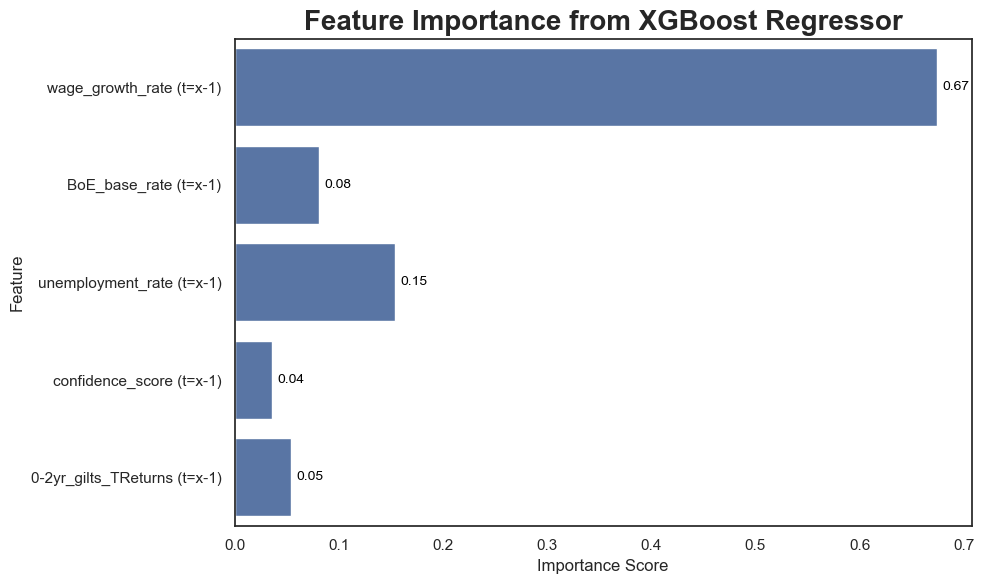

In [172]:
from xgboost import XGBRegressor

# 1. Prepare the data
# -------------------
regression_df = regression_df.dropna(
    subset=['wage_growth_rate (t=x)','wage_growth_rate (t=x-1)','BoE_base_rate (t=x-1)', 'unemployment_rate (t=x-1)', 'confidence_score (t=x-1)',
     '0-2yr_gilts_TReturns (t=x-1)'

])
# Define dependent variable
y = regression_df['wage_growth_rate (t=x)']

# Define independent variables
X = regression_df[
    [
'wage_growth_rate (t=x-1)','BoE_base_rate (t=x-1)', 'unemployment_rate (t=x-1)', 'confidence_score (t=x-1)',
     '0-2yr_gilts_TReturns (t=x-1)'

    ]
]
y = regression_df['wage_growth_rate (t=x)']
# 2. Train-test split
# -------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 3. Initialize and train XGBoost model
# -------------------------------------
xgb_model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror',
    random_state=42
)

xgb_model.fit(X_train, y_train)

# 4. Predict and evaluate
# -----------------------
y_pred = xgb_model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# 5. Plot feature importance
# --------------------------
feature_importance = pd.Series(xgb_model.feature_importances_, index=X.columns)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=feature_importance, y=feature_importance.index)

plt.title("Feature Importance from XGBoost Regressor", fontsize=20, fontweight='bold')
plt.xlabel("Importance Score")
plt.ylabel("Feature")

# Add value labels
for i, (value, name) in enumerate(zip(feature_importance, feature_importance.index)):
    ax.text(value + 0.005, i, f"{value:.2f}", color='black', va='center', fontsize=10)

plt.tight_layout()
plt.show()

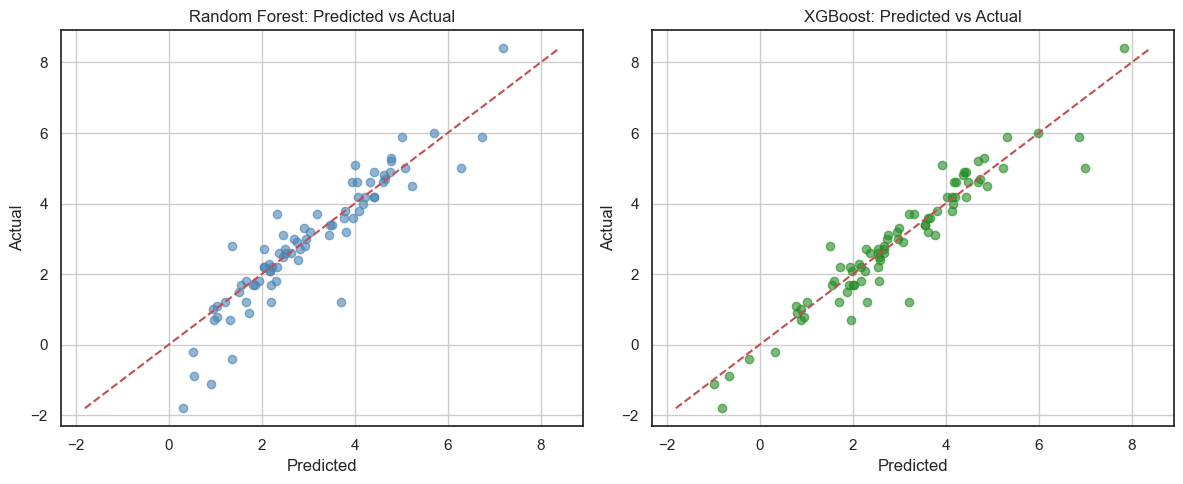

In [174]:
# --- Random Forest Predictions ---
rf_preds = rf_model.predict(X_test)

# --- XGBoost Predictions ---
xgb_preds = xgb_model.predict(X_test)

# --- Plot Predictions vs Actuals ---
plt.figure(figsize=(12, 5))

# Random Forest subplot
plt.subplot(1, 2, 1)
plt.scatter(rf_preds, y_test, alpha=0.6, color='steelblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest: Predicted vs Actual")
plt.grid(True)

# XGBoost subplot
plt.subplot(1, 2, 2)
plt.scatter(xgb_preds, y_test, alpha=0.6, color='forestgreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("XGBoost: Predicted vs Actual")
plt.grid(True)

plt.tight_layout()
plt.show()

#### Both the Random Forest and XGBoost models show strong performance in predicting wage growth, with R² scores of 0.8479 and 0.9094, respectively.In terms of feature importance, wage growth rate (t=x-1) is the most influential predictor in both models, contributing 54% in Random Forest and 67% in XGBoost. 

#### Both models attribute the same order of feature importance, albeit to slightly different relative magnitudes. 

#### The predicted vs. actual plots show that both models align well with the actual values, but XGBoost demonstrates slightly tighter clustering around the diagonal line, suggesting marginally better predictive accuracy.